# Default Credit Card Clients

Members:

1. Muchammad Daniyal Kautsar (NIM)

undefined. Bintang Restu Bawono (21/474703/TK/52376)

undefined. Qornain Aji (21/481767/TK/53170)

1. Annisa Uswa Sufia (21/475357/TK/52474)

## about the data

The datasets are used for research in Taiwan with 23 explanatory variables such as the amount of credit and payment history to determine whether a credit card is the default payment.

Datasource: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

Download the data

In [1]:
# %wget https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls

Install additional library

In [2]:
%pip install xlrd mlxtend numba

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Import Library

In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import numba
from numba import jit, njit
from numba.experimental import jitclass
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves
from joblib import Parallel, delayed
import random
from scipy import stats

Ignoring some warnings

In [4]:
# warnings.simplefilter("ignore", category=numba.NumbaDeprecationWarning)
# warnings.simplefilter("ignore", category=numba.NumbaWarnikamung)


Read the data

In [5]:
df = pd.read_excel('/work/default of credit card clients.xls',header=0, skiprows=[0])
df = df.drop(df.columns[0:1], axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.shape

(30000, 24)

There are 23 attributes with 3000 data entries used to determine the value of the default payment (Yes = 1, No = 0)

## Explanatory Data Analysis

In [7]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [9]:
df.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [10]:
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### Correlation Matrix

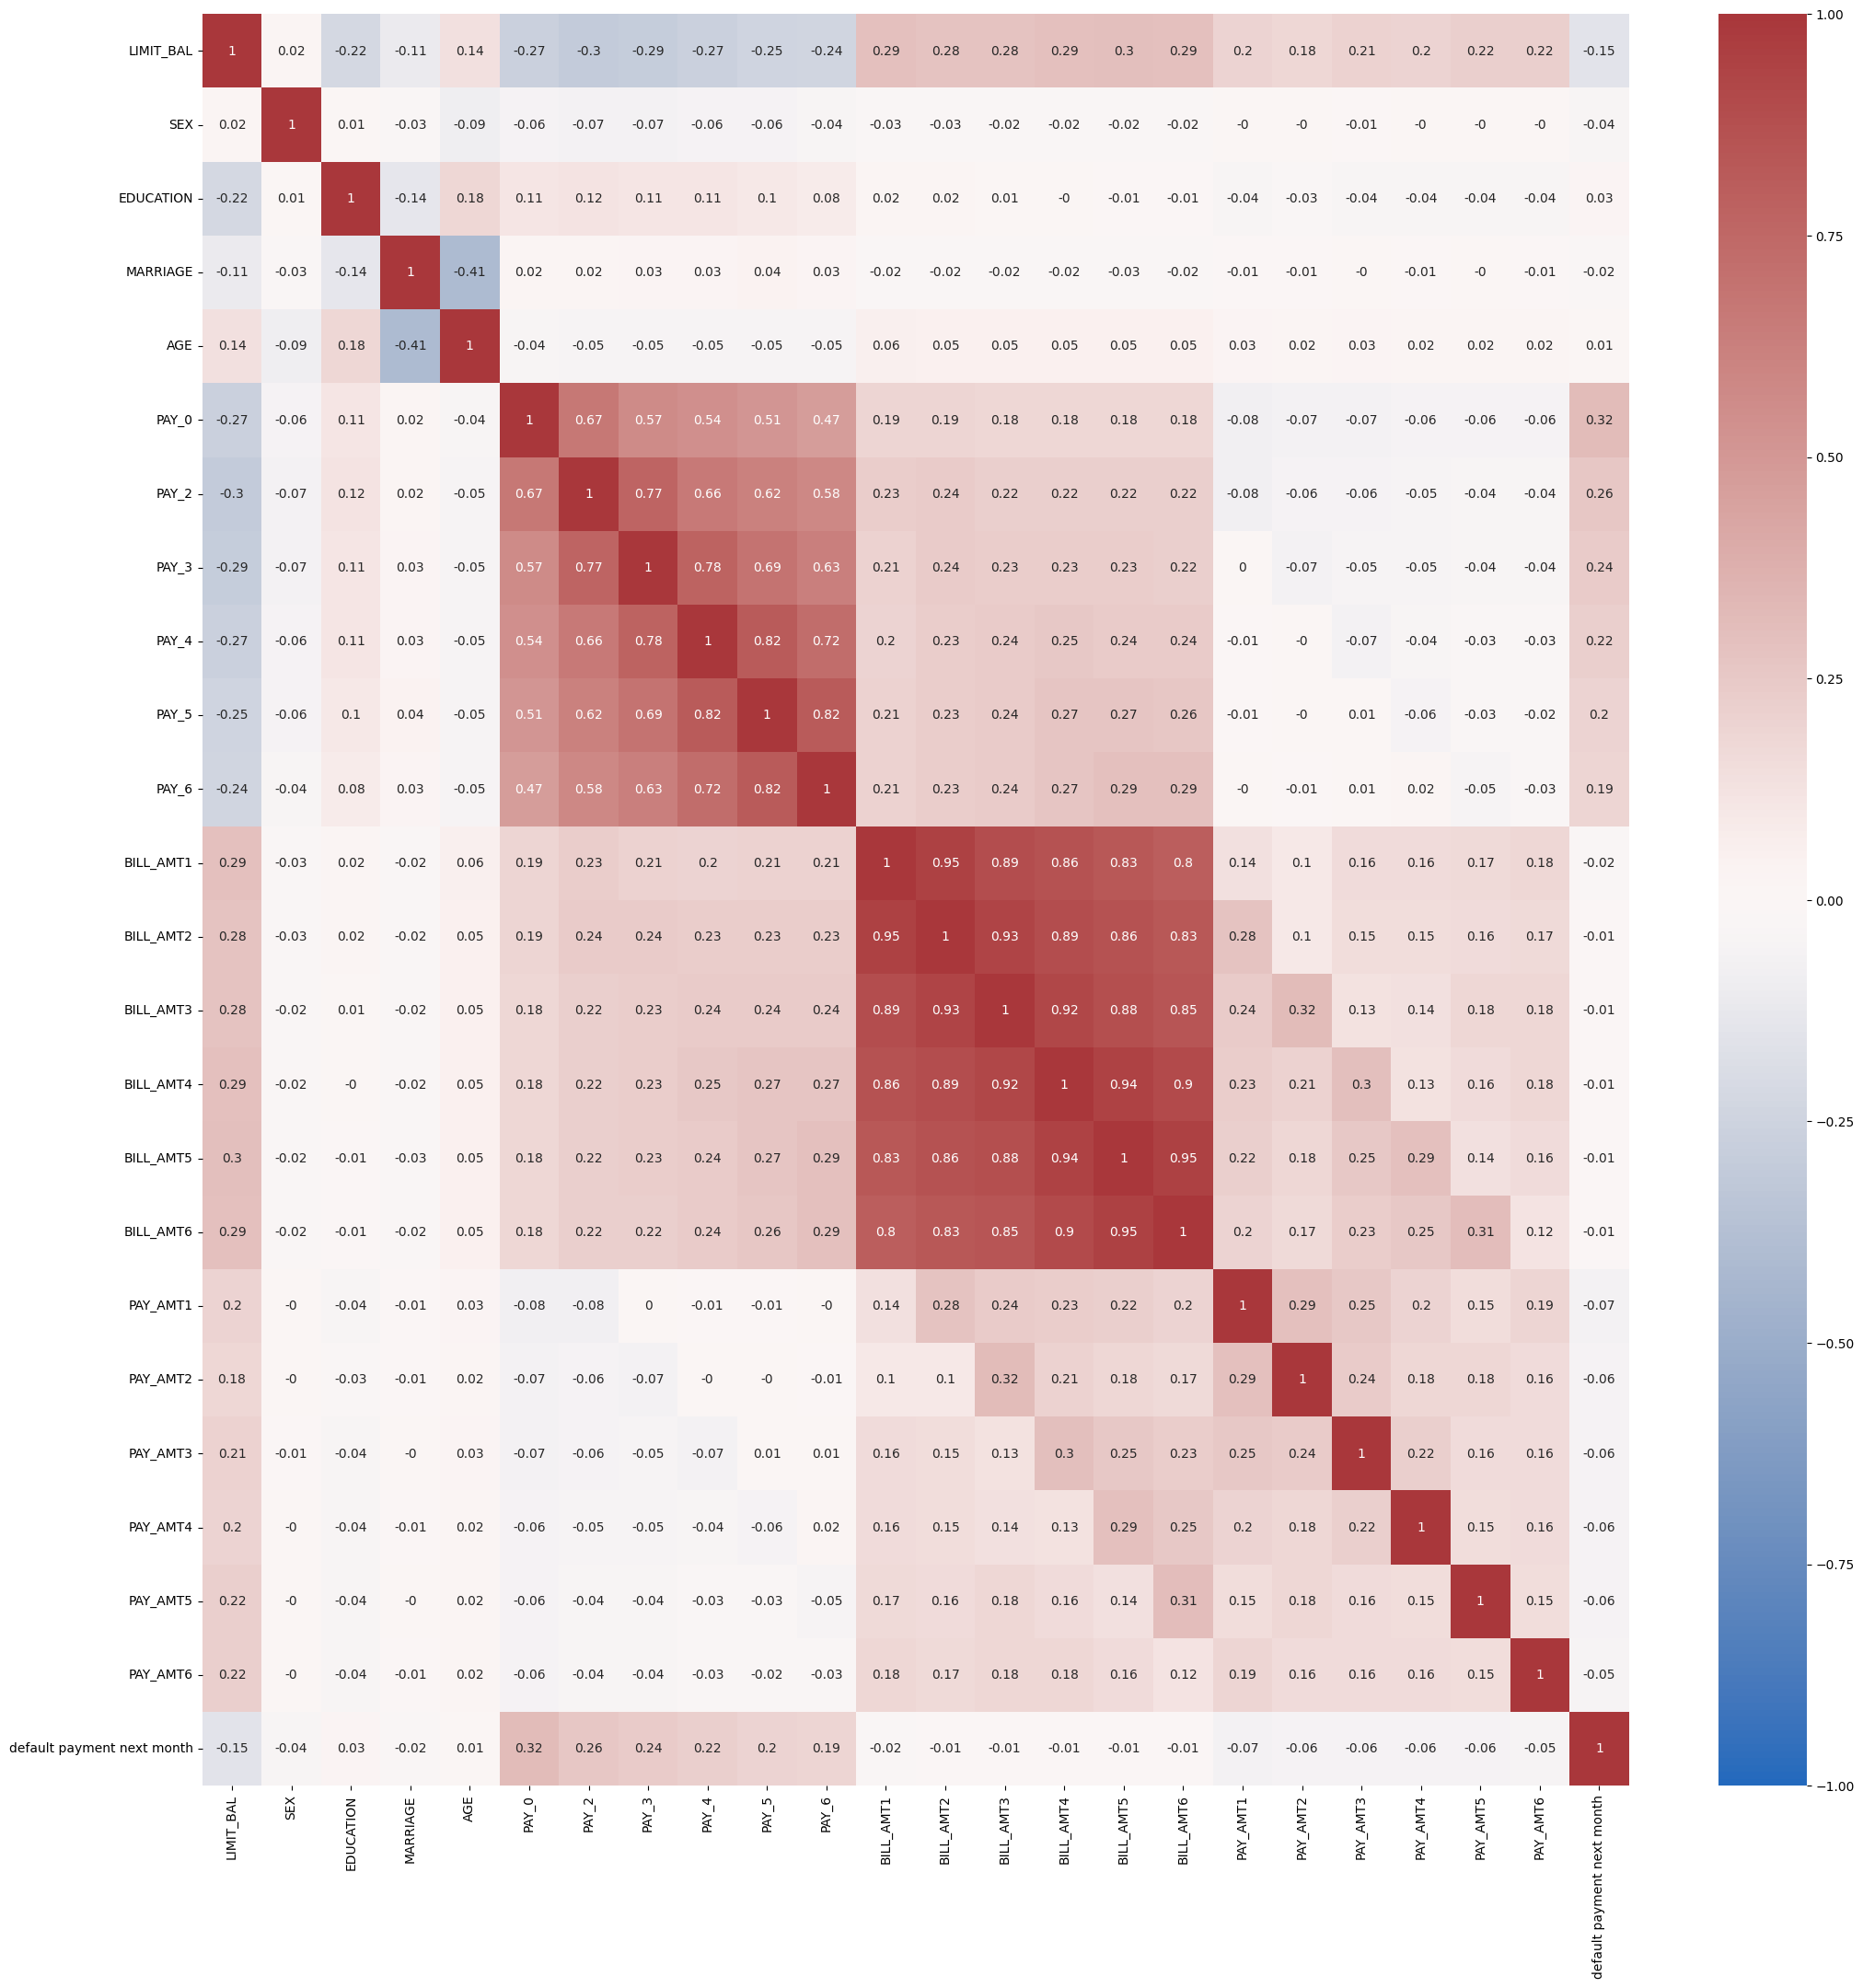

In [11]:
matrix = df.corr().round(2)
plt.figure(figsize=(25,25))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

### Data Distribution

array([[<AxesSubplot: title={'center': 'LIMIT_BAL'}>,
        <AxesSubplot: title={'center': 'SEX'}>,
        <AxesSubplot: title={'center': 'EDUCATION'}>,
        <AxesSubplot: title={'center': 'MARRIAGE'}>,
        <AxesSubplot: title={'center': 'AGE'}>],
       [<AxesSubplot: title={'center': 'PAY_0'}>,
        <AxesSubplot: title={'center': 'PAY_2'}>,
        <AxesSubplot: title={'center': 'PAY_3'}>,
        <AxesSubplot: title={'center': 'PAY_4'}>,
        <AxesSubplot: title={'center': 'PAY_5'}>],
       [<AxesSubplot: title={'center': 'PAY_6'}>,
        <AxesSubplot: title={'center': 'BILL_AMT1'}>,
        <AxesSubplot: title={'center': 'BILL_AMT2'}>,
        <AxesSubplot: title={'center': 'BILL_AMT3'}>,
        <AxesSubplot: title={'center': 'BILL_AMT4'}>],
       [<AxesSubplot: title={'center': 'BILL_AMT5'}>,
        <AxesSubplot: title={'center': 'BILL_AMT6'}>,
        <AxesSubplot: title={'center': 'PAY_AMT1'}>,
        <AxesSubplot: title={'center': 'PAY_AMT2'}>,
        <A

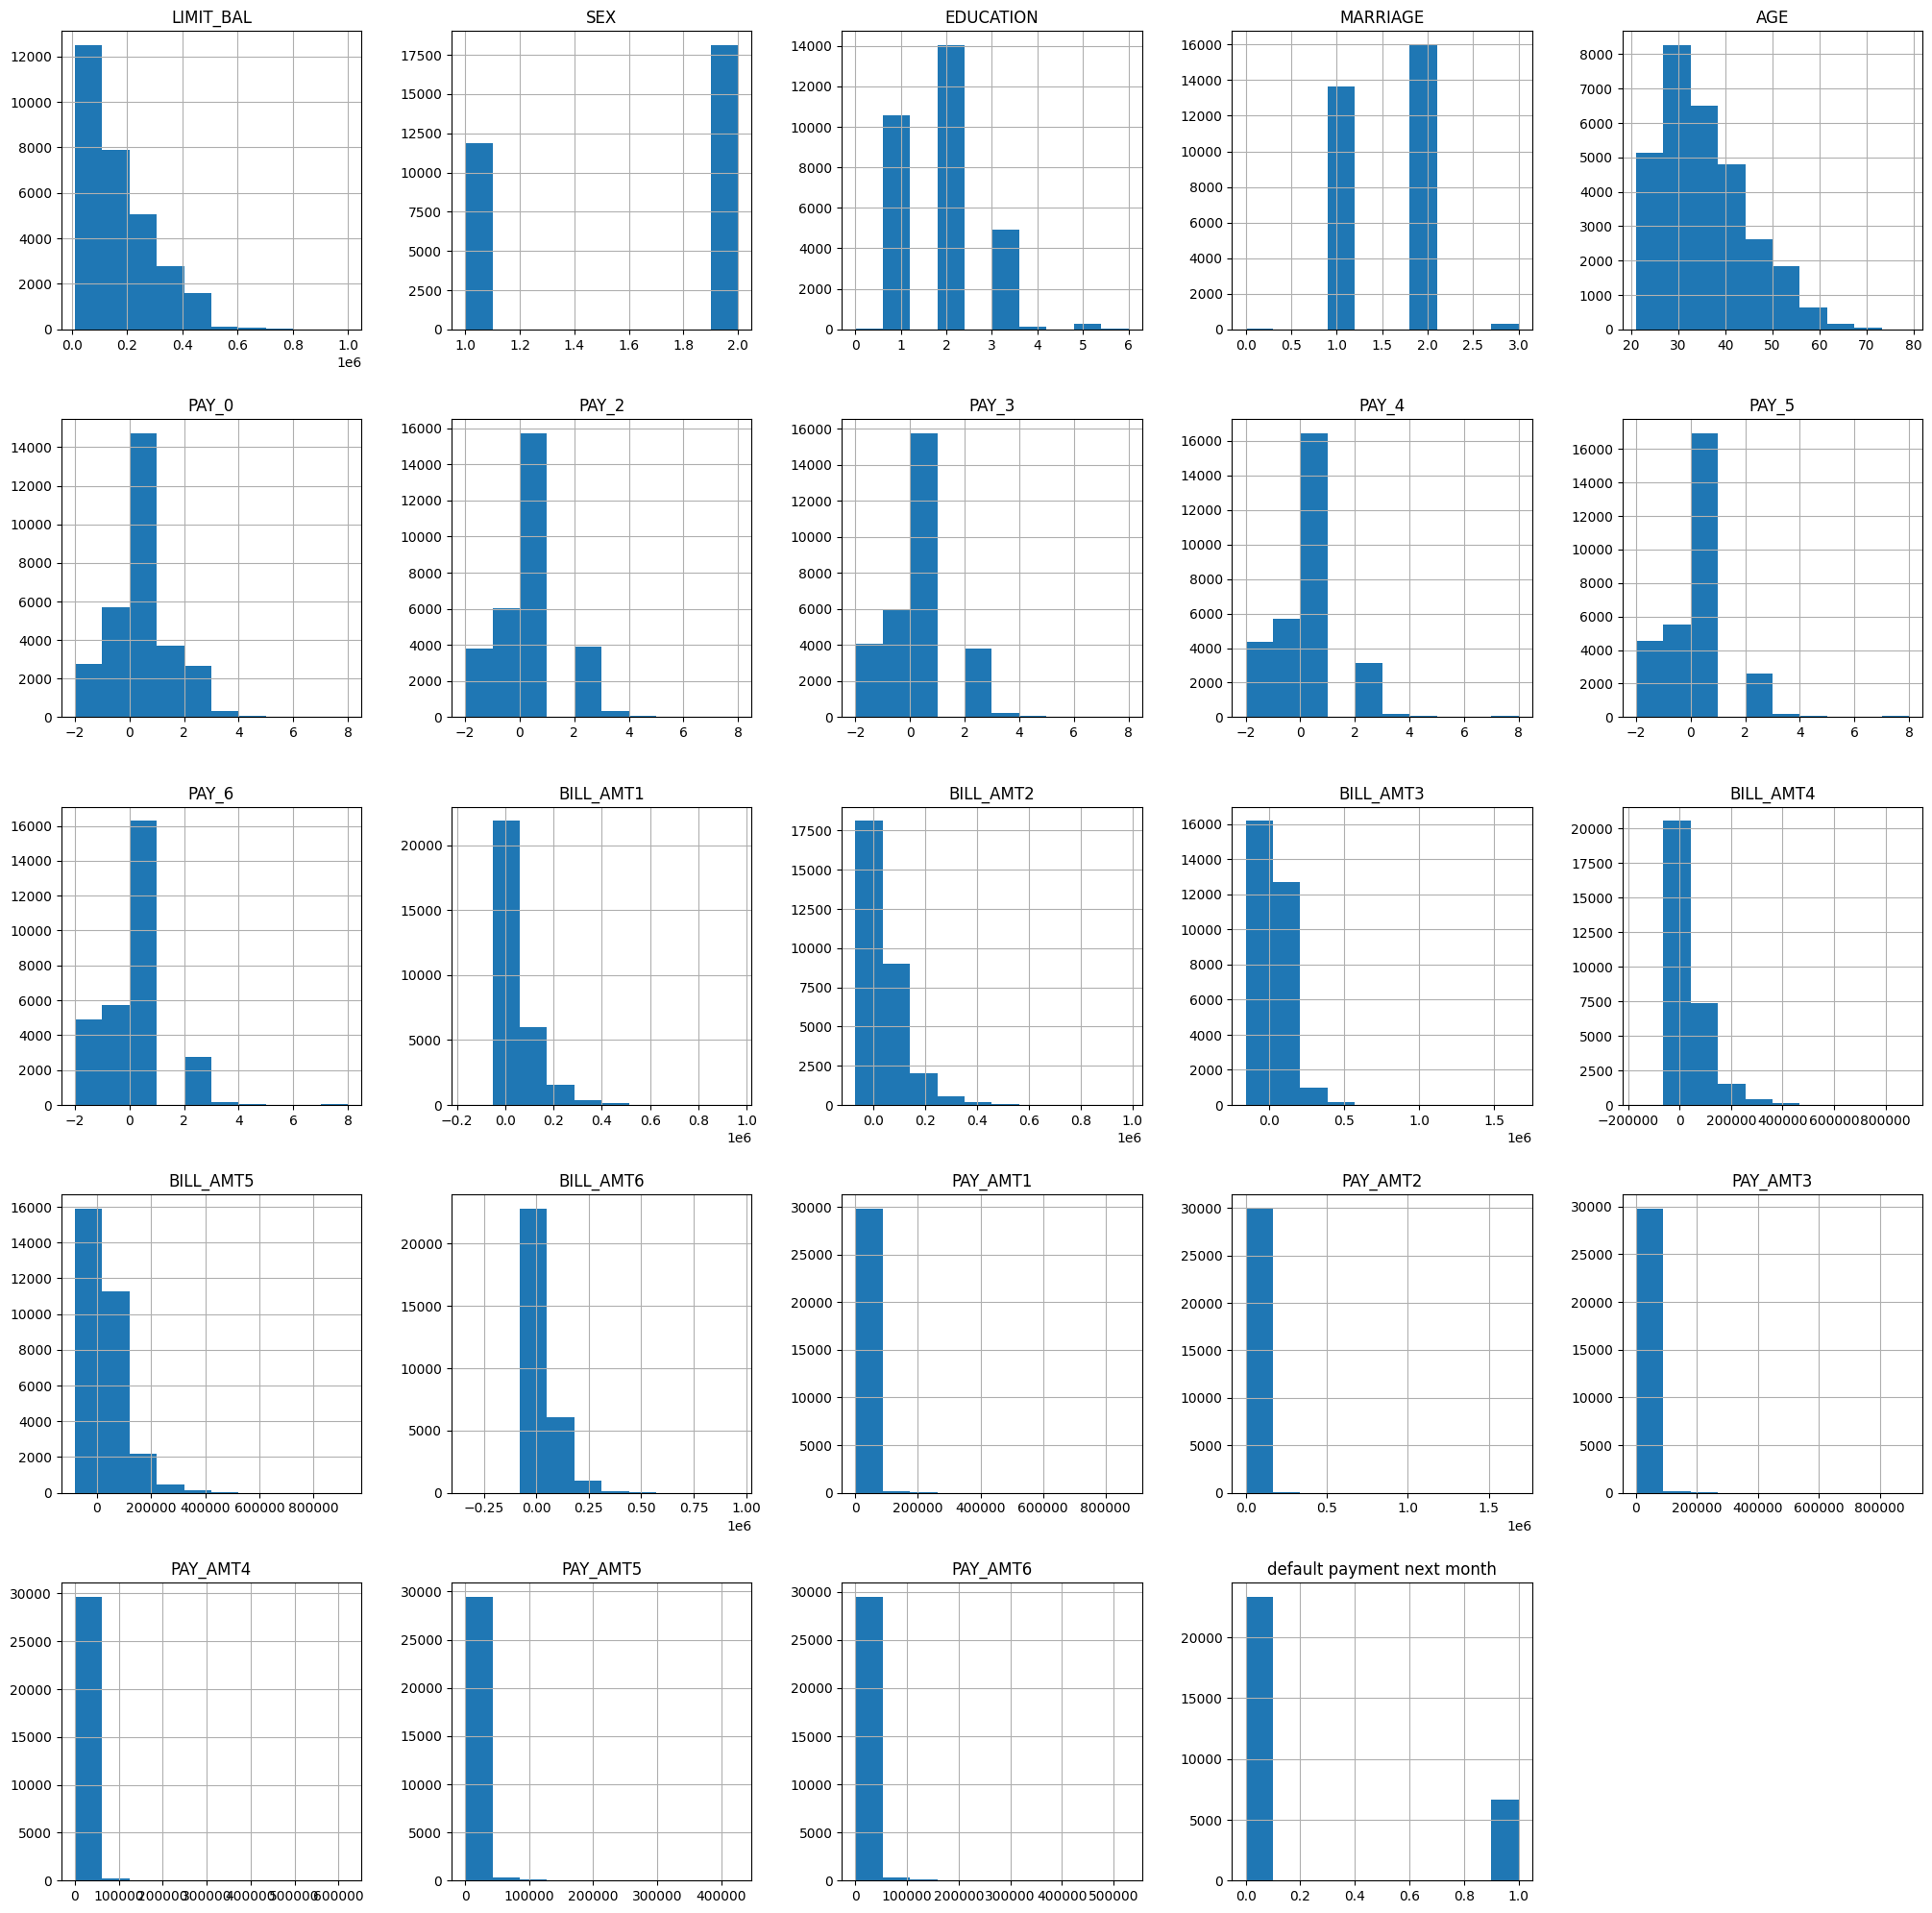

In [12]:
df.hist(figsize=(25, 25))

### Detect Outliers using Boxplot

<AxesSubplot: >

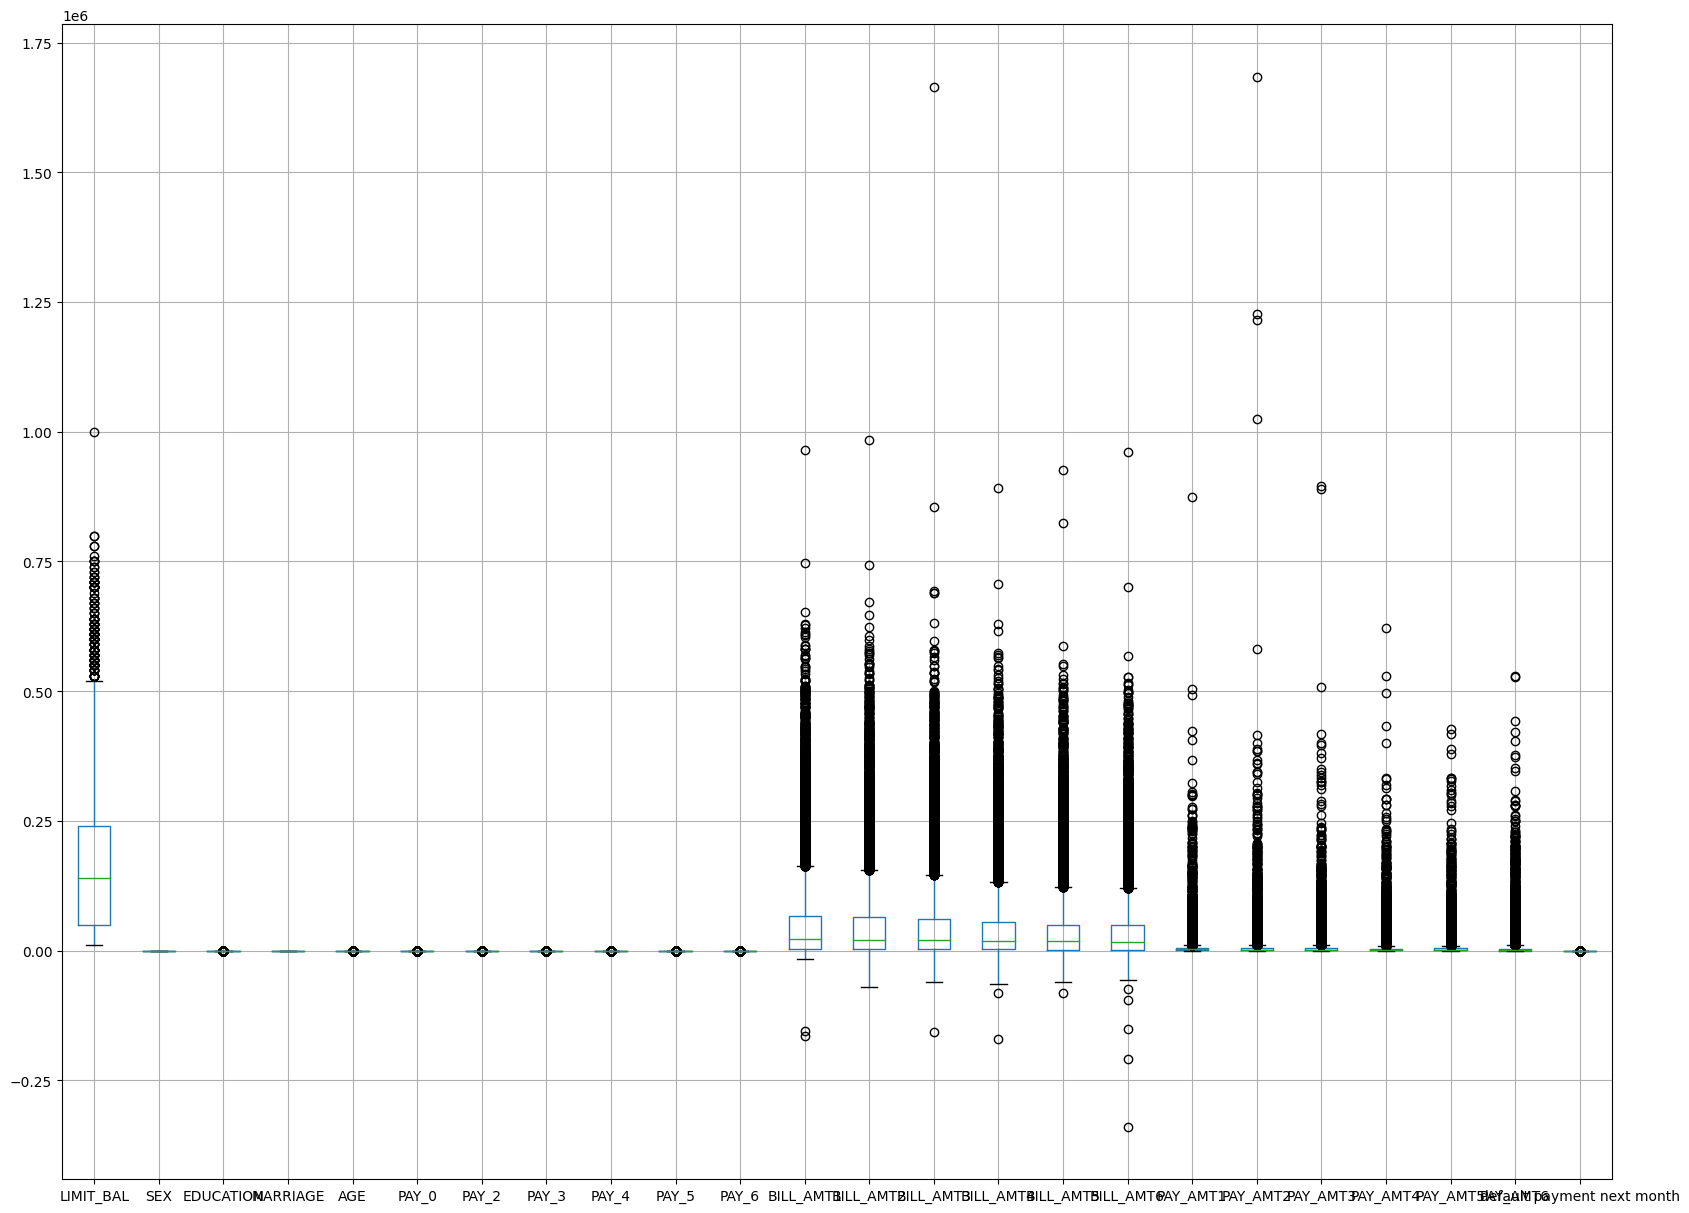

In [13]:
df.boxplot(figsize=(20, 15))

## Data Preprocessing

### Detect Null Values

In [14]:
df.isnull().sum()
# there are no null values

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### Feature Selection

### Add necessary Column
- Transform the features with numerical data onto range of intervals
- Calculate related data from given data such as: average payment, total amount, late payment, etc.

In [15]:
# Group LIMIT_BAL into credit limit categories
df['CREDIT_LIMIT_GROUP'] = pd.cut(df['LIMIT_BAL'], bins=[0, 50000, 100000, 200000, 300000, 500000, 1000000], labels=[1,2,3,4,5,6]).astype('int')

# Group AGE into age groups
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 20, 30, 40, 50, 60, 70, 120], labels=[1,2,3,4,5,6,7]).astype('int')

# Group PAY_X (X = 0, 2, 3, 4, 5, 6) into payment status categories
pmt_mapping = {-2: 1, -1: 2, 0: 3, 1: 4, 2: 5, 3: 6, 4: 7, 5: 8, 6: 9}
for col in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    df[f'{col}_GROUP'] = df[col].map(pmt_mapping)
    df[f'{col}_GROUP'] = df[f'{col}_GROUP'].astype("Int64")

# Group BILL_AMT_X (X = 1, 2, 3, 4, 5, 6) into bill amount categories
bill_mapping = {-2: 1, -1: 2, 0: 3, 1: 4, 2: 5, 3: 6, 4: 7, 5: 8}
for col in ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']:
    df[f'{col}_GROUP'] = pd.cut(df[col], bins=[-np.inf, -2, -1, 0, 1, 2, 3, 4, np.inf], labels=bill_mapping.values())
    df[f'{col}_GROUP'] = df[f'{col}_GROUP'].astype("Int64")

In [16]:
late_pmt_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df['LATE_PMT_PCT'] = (df[late_pmt_cols] > 0).sum(axis=1) / len(late_pmt_cols)

owed_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
late_pmt_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df['TOTAL_AMOUNT_OWED'] = df[owed_cols].sum(axis=1) + df[df[late_pmt_cols] > 0][['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1).round(2)


In [17]:
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df['TOTAL_UNPAID_BILLS'] = (df[bill_cols].sum(axis=1) - df[pay_cols].sum(axis=1)).round(2)

In [18]:
df['AVG_PAY_DELAY'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)
df['CREDIT_UTIL_RATIO'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1) / df['LIMIT_BAL']

late_pmt_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df['HAS_LATE_PAYMENT'] = (df[late_pmt_cols] > 0).any(axis=1).astype(int)

bins = [0, 20, 30, 40, 50, 60, 70, 120]
labels = [int(1),int(2),int(3),int(4),int(5),int(6),int(7)]
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels)

bill_change_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
df['BILL_AMT_PCT_CHANGE'] = (df[bill_change_cols].iloc[:,-1] - df[bill_change_cols].iloc[:,0]) / df[bill_change_cols].iloc[:,0]

In [19]:
owed_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
df['UTILIZATION_RATIO'] = df[owed_cols].sum(axis=1) / df['LIMIT_BAL']

owed_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pmt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df['PAYMENT_RATIO'] = df[pmt_cols].sum(axis=1) / df[owed_cols].sum(axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   30000 non-null  int64   
 1   SEX                         30000 non-null  int64   
 2   EDUCATION                   30000 non-null  int64   
 3   MARRIAGE                    30000 non-null  int64   
 4   AGE                         30000 non-null  int64   
 5   PAY_0                       30000 non-null  int64   
 6   PAY_2                       30000 non-null  int64   
 7   PAY_3                       30000 non-null  int64   
 8   PAY_4                       30000 non-null  int64   
 9   PAY_5                       30000 non-null  int64   
 10  PAY_6                       30000 non-null  int64   
 11  BILL_AMT1                   30000 non-null  int64   
 12  BILL_AMT2                   30000 non-null  int64   
 13  BILL_AMT3       

In [21]:
df2 = pd.read_csv('/work/Credit_2.csv', index_col=0)
df2 = df2.drop('ID', axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27989 entries, 0 to 29999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   27989 non-null  int64  
 1   SEX                         27989 non-null  int64  
 2   EDUCATION                   27989 non-null  int64  
 3   MARRIAGE                    27989 non-null  int64  
 4   AGE                         27989 non-null  int64  
 5   PAY_0                       27989 non-null  int64  
 6   PAY_2                       27989 non-null  int64  
 7   PAY_3                       27989 non-null  int64  
 8   PAY_4                       27989 non-null  int64  
 9   PAY_5                       27989 non-null  int64  
 10  PAY_6                       27989 non-null  int64  
 11  BILL_AMT1                   27989 non-null  int64  
 12  BILL_AMT2                   27989 non-null  int64  
 13  BILL_AMT3                   279

In [22]:
numerical = []
categorical = []
for col in df2.columns : 
    if len(df2[col].unique()) <= 20 : 
        categorical.append(col)
    else : 
        numerical.append(col)


In [23]:
df_categorical = df2[categorical]
df_numerical = df2[numerical]

### Categorical Feature Selection ( Chi-Square )

In [24]:
def chi2_by_hand(df, col1, col2):    
    #---create the contingency table---
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    display(df_cont)
    #---calculate degree of freedom---
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    #---sum up the totals for row and columns---
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()
    print('---Observed (O)---')
    display(df_cont)
    #---create the expected value dataframe---
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(
        df_cont.sum(1).values,df_cont.sum().values) / df_cont.sum().sum()            
    print('---Expected (E)---')
    display(df_exp)
        
    # calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    print('---Chi-Square---')
    display(df_chi2)
    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)
    
    return chi_square_score, degree_f,p

In [25]:
cols = []
chi_square = []
p_value = []
for col in df_categorical.columns : 
    chi_score, degree_f,p = chi2_by_hand(df_categorical,col,'default payment next month')
    cols.append(col)
    chi_square.append(chi_score)
    p_value.append(p)
    print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

default payment next month,0,1
SEX,,
1,8586,2678
2,13301,3424


---Observed (O)---


default payment next month,0,1,Total
SEX,,,
1,8586,2678,11264
2,13301,3424,16725
Total,21887,6102,27989


---Expected (E)---


default payment next month,0,1,Total
SEX,,,
1,8808.287827,2455.712173,11264.0
2,13078.712173,3646.287827,16725.0
Total,21887.000000,6102.000000,27989.0


---Chi-Square---


default payment next month,0,1,Total
SEX,,,
1,5.609703,20.121201,25.730904
2,3.778039,13.551283,17.329321
Total,9.387741,33.672484,43.060225


Chi2_score: 43.060225425953305, Degrees of freedom: 1, p-value: 5.30804664504726e-11


default payment next month,0,1
EDUCATION,,
0,10,0
1,7830,1761
2,10166,3156
3,3491,1153
4,105,6
5,245,18
6,40,8


---Observed (O)---


default payment next month,0,1,Total
EDUCATION,,,
0,10,0,10
1,7830,1761,9591
2,10166,3156,13322
3,3491,1153,4644
4,105,6,111
5,245,18,263
6,40,8,48
Total,21887,6102,27989


---Expected (E)---


default payment next month,0,1,Total
EDUCATION,,,
0,7.819858,2.180142,10.0
1,7500.025617,2090.974383,9591.0
2,10417.614563,2904.385437,13322.0
3,3631.541963,1012.458037,4644.0
4,86.800422,24.199578,111.0
5,205.662260,57.337740,263.0
6,37.535317,10.464683,48.0
Total,21887.000000,6102.000000,27989.0


---Chi-Square---


default payment next month,0,1,Total
EDUCATION,,,
0,0.607814,2.180142,2.787956
1,14.517696,52.072897,66.590593
2,6.077196,21.798033,27.875229
3,5.439024,19.509000,24.948023
4,3.815934,13.687208,17.503141
5,7.524267,26.988468,34.512735
6,0.161839,0.580492,0.742330
Total,38.143770,136.816239,174.960008


Chi2_score: 174.96000829744287, Degrees of freedom: 6, p-value: 3.986875421058461e-35


default payment next month,0,1
MARRIAGE,,
0,46,5
1,9749,2937
2,11864,3080
3,228,80


---Observed (O)---


default payment next month,0,1,Total
MARRIAGE,,,
0,46,5,51
1,9749,2937,12686
2,11864,3080,14944
3,228,80,308
Total,21887,6102,27989


---Expected (E)---


default payment next month,0,1,Total
MARRIAGE,,,
0,39.881275,11.118725,51.0
1,9920.271607,2765.728393,12686.0
2,11685.995498,3258.004502,14944.0
3,240.851620,67.148380,308.0
Total,21887.000000,6102.000000,27989.0


---Chi-Square---


default payment next month,0,1,Total
MARRIAGE,,,
0,0.938756,3.367184,4.305941
1,2.956972,10.606234,13.563206
2,2.711417,9.725463,12.436880
3,0.685751,2.459689,3.145440
Total,7.292895,26.158571,33.451466


Chi2_score: 33.451466337647986, Degrees of freedom: 3, p-value: 2.586420742478082e-07


default payment next month,0,1
PAY_0,,
-2,1850,215
-1,4729,954
0,12849,1888
1,1506,868
2,823,1844
3,78,244
4,24,52
5,13,13
6,5,6


---Observed (O)---


default payment next month,0,1,Total
PAY_0,,,
-2,1850,215,2065
-1,4729,954,5683
0,12849,1888,14737
1,1506,868,2374
2,823,1844,2667
3,78,244,322
4,24,52,76
5,13,13,26
6,5,6,11


---Expected (E)---


default payment next month,0,1,Total
PAY_0,,,
-2,1614.800636,450.199364,2065.0
-1,4444.025188,1238.974812,5683.0
0,11524.124442,3212.875558,14737.0
1,1856.434242,517.565758,2374.0
2,2085.556076,581.443924,2667.0
3,251.799421,70.200579,322.0
4,59.430919,16.569081,76.0
5,20.331630,5.668370,26.0
6,8.601844,2.398156,11.0


---Chi-Square---


default payment next month,0,1,Total
PAY_0,,,
-2,34.257319,122.876097,157.133416
-1,18.274119,65.546646,83.820764
0,152.314846,546.331538,698.646384
1,66.150556,237.272571,303.423127
2,764.327492,2741.533237,3505.860728
3,119.961510,430.284754,550.246265
4,21.122844,75.764616,96.887460
5,2.643802,9.482939,12.126741
6,1.508197,5.409688,6.917885


Chi2_score: 5446.122569153301, Degrees of freedom: 10, p-value: 0.0


default payment next month,0,1
PAY_2,,
-2,1926,246
-1,4772,877
0,13227,2503
1,23,5
2,1743,2184
3,125,201
4,49,50
5,10,15
6,3,9


---Observed (O)---


default payment next month,0,1,Total
PAY_2,,,
-2,1926,246,2172
-1,4772,877,5649
0,13227,2503,15730
1,23,5,28
2,1743,2184,3927
3,125,201,326
4,49,50,99
5,10,15,25
6,3,9,12


---Expected (E)---


default payment next month,0,1,Total
PAY_2,,,
-2,1698.473114,473.526886,2172.0
-1,4417.437672,1231.562328,5649.0
0,12300.636321,3429.363679,15730.0
1,21.895602,6.104398,28.0
2,3070.858159,856.141841,3927.0
3,254.927364,71.072636,326.0
4,77.416592,21.583408,99.0
5,19.549645,5.450355,25.0
6,9.383829,2.616171,12.0


---Chi-Square---


default payment next month,0,1,Total
PAY_2,,,
-2,30.479425,109.325331,139.804756
-1,28.458680,102.077208,130.535888
0,69.764656,250.235830,320.000486
1,0.055705,0.199806,0.255511
2,574.174123,2059.480338,2633.654461
3,66.219333,237.519262,303.738595
4,10.430616,37.413124,47.843740
5,4.664827,16.732066,21.396893
6,4.342926,15.577454,19.920380


Chi2_score: 3634.5470211219867, Degrees of freedom: 10, p-value: 0.0


default payment next month,0,1
PAY_3,,
-2,2315,350
-1,4632,819
0,12972,2745
1,3,1
2,1810,1958
3,99,135
4,32,44
5,9,12
6,9,14


---Observed (O)---


default payment next month,0,1,Total
PAY_3,,,
-2,2315,350,2665
-1,4632,819,5451
0,12972,2745,15717
1,3,1,4
2,1810,1958,3768
3,99,135,234
4,32,44,76
5,9,12,21
6,9,14,23


---Expected (E)---


default payment next month,0,1,Total
PAY_3,,,
-2,2083.992104,581.007896,2665.0
-1,4262.604487,1188.395513,5451.0
0,12290.470506,3426.529494,15717.0
1,3.127943,0.872057,4.0
2,2946.522420,821.477580,3768.0
3,182.984673,51.015327,234.0
4,59.430919,16.569081,76.0
5,16.421701,4.578299,21.0
6,17.985673,5.014327,23.0


---Chi-Square---


default payment next month,0,1,Total
PAY_3,,,
-2,25.606934,91.848404,117.455338
-1,32.011660,114.821239,146.832898
0,37.792081,135.554780,173.346860
1,0.005233,0.018771,0.024004
2,438.375490,1572.390094,2010.765584
3,38.546536,138.260903,176.807438
4,12.661008,45.413222,58.074229
5,3.354199,12.031031,15.385230
6,4.489258,16.102324,20.591581


Chi2_score: 2779.232962941705, Degrees of freedom: 10, p-value: 0.0


default payment next month,0,1
PAY_4,,
-2,2541,429
-1,4405,822
0,13340,2995
1,1,1
2,1476,1630
3,70,110
4,23,46
5,17,18
6,3,2


---Observed (O)---


default payment next month,0,1,Total
PAY_4,,,
-2,2541,429,2970
-1,4405,822,5227
0,13340,2995,16335
1,1,1,2
2,1476,1630,3106
3,70,110,180
4,23,46,69
5,17,18,35
6,3,2,5


---Expected (E)---


default payment next month,0,1,Total
PAY_4,,,
-2,2322.497767,647.502233,2970.0
-1,4087.439673,1139.560327,5227.0
0,12773.737718,3561.262282,16335.0
1,1.563972,0.436028,2.0
2,2428.847833,677.152167,3106.0
3,140.757440,39.242560,180.0
4,53.957019,15.042981,69.0
5,27.369502,7.630498,35.0
6,3.909929,1.090071,5.0


---Chi-Square---


default payment next month,0,1,Total
PAY_4,,,
-2,20.556845,73.734457,94.291302
-1,24.671816,88.494272,113.166088
0,25.102517,90.039134,115.141651
1,0.203369,0.729457,0.932826
2,373.806453,1340.790205,1714.596658
3,35.569099,127.581265,163.150364
4,17.761119,63.706589,81.467707
5,3.928701,14.091686,18.020387
6,0.211761,0.759557,0.971318


Chi2_score: 2429.084878756991, Degrees of freedom: 10, p-value: 0.0


default payment next month,0,1
PAY_5,,
-2,2721,493
-1,4269,814
0,13602,3159
2,1181,1411
3,64,112
4,32,51
5,7,10
6,1,3
7,10,48


---Observed (O)---


default payment next month,0,1,Total
PAY_5,,,
-2,2721,493,3214
-1,4269,814,5083
0,13602,3159,16761
2,1181,1411,2592
3,64,112,176
4,32,51,83
5,7,10,17
6,1,3,4
7,10,48,58


---Expected (E)---


default payment next month,0,1,Total
PAY_5,,,
-2,2513.302297,700.697703,3214.0
-1,3974.833720,1108.166280,5083.0
0,13106.863661,3654.136339,16761.0
2,2026.907142,565.092858,2592.0
3,137.629497,38.370503,176.0
4,64.904820,18.095180,83.0
5,13.293758,3.706242,17.0
6,3.127943,0.872057,4.0
7,45.355175,12.644825,58.0


---Chi-Square---


default payment next month,0,1,Total
PAY_5,,,
-2,17.164006,61.564831,78.728837
-1,21.770420,78.087379,99.857799
0,18.704703,67.091091,85.795794
2,353.029933,1266.267805,1619.297739
3,39.390559,141.288294,180.678853
4,16.681768,59.835113,76.516882
5,2.979699,10.687752,13.667451
6,1.447642,5.192485,6.640127
7,27.559995,98.853756,126.413751


Chi2_score: 2291.1840893818458, Degrees of freedom: 9, p-value: 0.0


default payment next month,0,1
PAY_6,,
-2,2995,596
-1,4389,867
0,13056,3042
2,1345,1388
3,65,117
4,18,31
5,6,7
6,5,14
7,8,38


---Observed (O)---


default payment next month,0,1,Total
PAY_6,,,
-2,2995,596,3591
-1,4389,867,5256
0,13056,3042,16098
2,1345,1388,2733
3,65,117,182
4,18,31,49
5,6,7,13
6,5,14,19
7,8,38,46


---Expected (E)---


default payment next month,0,1,Total
PAY_6,,,
-2,2808.110936,782.889064,3591.0
-1,4110.117260,1145.882740,5256.0
0,12588.407088,3509.592912,16098.0
2,2137.167137,595.832863,2733.0
3,142.321412,39.678588,182.0
4,38.317303,10.682697,49.0
5,10.165815,2.834185,13.0
6,14.857730,4.142270,19.0
7,35.971346,10.028654,46.0


---Chi-Square---


default payment next month,0,1,Total
PAY_6,,,
-2,12.438085,44.613629,57.051714
-1,18.922960,67.873945,86.796905
0,17.368610,62.298716,79.667325
2,293.626438,1053.195975,1346.822413
3,42.007739,150.675744,192.683483
4,10.773013,38.641255,49.414268
5,1.707095,6.123107,7.830202
6,6.540356,23.459319,29.999675
7,21.750540,78.016071,99.766611


Chi2_score: 1957.2063083585203, Degrees of freedom: 9, p-value: 0.0


default payment next month,0,1
default payment next month,,
0,21887,0
1,0,6102


---Observed (O)---


default payment next month,0,1,Total
default payment next month,,,
0,21887,0,21887
1,0,6102,6102
Total,21887,6102,27989


---Expected (E)---


default payment next month,0,1,Total
default payment next month,,,
0,17115.32277,4771.67723,21887.0
1,4771.67723,1330.32277,6102.0
Total,21887.00000,6102.00000,27989.0


---Chi-Square---


default payment next month,0,1,Total
default payment next month,,,
0,1330.32277,4771.67723,6102.0
1,4771.67723,17115.32277,21887.0
Total,6102.00000,21887.00000,27989.0


Chi2_score: 27988.999999999996, Degrees of freedom: 1, p-value: 0.0


default payment next month,0,1
LATE_PMT_PCT,,
0.000000,17071,2185
0.166667,2227,973
0.333333,1112,718
0.500000,549,572
0.666667,404,540
0.833333,126,171
1.000000,398,943


---Observed (O)---


default payment next month,0,1,Total
LATE_PMT_PCT,,,
0.0,17071,2185,19256
0.1666666666666666,2227,973,3200
0.3333333333333333,1112,718,1830
0.5,549,572,1121
0.6666666666666666,404,540,944
0.8333333333333334,126,171,297
1.0,398,943,1341
Total,21887,6102,27989


---Expected (E)---


default payment next month,0,1,Total
LATE_PMT_PCT,,,
0.0,15057.918182,4198.081818,19256.0
0.1666666666666666,2502.354496,697.645504,3200.0
0.3333333333333333,1431.033978,398.966022,1830.0
0.5,876.606060,244.393940,1121.0
0.6666666666666666,738.194576,205.805424,944.0
0.8333333333333334,232.249777,64.750223,297.0
1.0,1048.642931,292.357069,1341.0
Total,21887.000000,6102.000000,27989.0


---Chi-Square---


default payment next month,0,1,Total
LATE_PMT_PCT,,,
0.0,269.127402,965.321445,1234.448847
0.1666666666666666,30.299503,108.679979,138.979482
0.3333333333333333,71.125271,255.116158,326.241429
0.5,122.433252,439.150537,561.583789
0.6666666666666666,151.296174,542.677705,693.973879
0.8333333333333334,48.607216,174.347121,222.954337
1.0,403.699116,1448.010905,1851.710021
Total,1096.587933,3933.303851,5029.891784


Chi2_score: 5029.891783854635, Degrees of freedom: 6, p-value: 0.0


default payment next month,0,1
HAS_LATE_PAYMENT,,
0,17071,2185
1,4816,3917


---Observed (O)---


default payment next month,0,1,Total
HAS_LATE_PAYMENT,,,
0,17071,2185,19256
1,4816,3917,8733
Total,21887,6102,27989


---Expected (E)---


default payment next month,0,1,Total
HAS_LATE_PAYMENT,,,
0,15057.918182,4198.081818,19256.0
1,6829.081818,1903.918182,8733.0
Total,21887.000000,6102.000000,27989.0


---Chi-Square---


default payment next month,0,1,Total
HAS_LATE_PAYMENT,,,
0,269.127402,965.321445,1234.448847
1,593.417756,2128.504493,2721.922249
Total,862.545158,3093.825938,3956.371096


Chi2_score: 3956.371095904252, Degrees of freedom: 1, p-value: 0.0


default payment next month,0,1
AGE_GROUP,,
2,8049,2324
3,7926,1982
4,4321,1289
5,1409,452
6,173,53
7,9,2


---Observed (O)---


default payment next month,0,1,Total
AGE_GROUP,,,
2,8049,2324,10373
3,7926,1982,9908
4,4321,1289,5610
5,1409,452,1861
6,173,53,226
7,9,2,11
Total,21887,6102,27989


---Expected (E)---


default payment next month,0,1,Total
AGE_GROUP,,,
2,8111.538497,2261.461503,10373.0
3,7747.915110,2160.084890,9908.0
4,4386.940227,1223.059773,5610.0
5,1455.275537,405.724463,1861.0
6,176.728786,49.271214,226.0
7,8.601844,2.398156,11.0
Total,21887.000000,6102.000000,27989.0


---Chi-Square---


default payment next month,0,1,Total
AGE_GROUP,,,
2,0.482161,1.729441,2.211601
3,4.093260,14.681936,18.775196
4,0.991149,3.555111,4.546261
5,1.471491,5.278029,6.749520
6,0.078673,0.282190,0.360863
7,0.018430,0.066104,0.084534
Total,7.135164,25.592811,32.727975


Chi2_score: 32.72797483892141, Degrees of freedom: 5, p-value: 4.2616610409135e-06


In [26]:
dict = {'Column': cols, 'chi_square': chi_square, 'score': p_value} 

df_categorical_selected = pd.DataFrame(dict)
df_categorical_selected = df_categorical.drop(columns =['AGE_GROUP','MARRIAGE',"SEX","EDUCATION"],axis = 1)

### Numerical Feature Selection (ANOVA)

Feature 0: 607.631737
Feature 1: 0.006590
Feature 2: 5.570302
Feature 3: 3.040826
Feature 4: 3.250923
Feature 5: 1.410283
Feature 6: 0.631068
Feature 7: 0.154091
Feature 8: 115.946362
Feature 9: 89.683166
Feature 10: 63.745855
Feature 11: 84.262938
Feature 12: 54.627801
Feature 13: 58.332974
Feature 14: 2.267513
Feature 15: 0.659941
Feature 16: 2252.747383
Feature 17: 366.960530
Feature 18: 0.024810
Feature 19: 366.960530
Feature 20: 0.042735


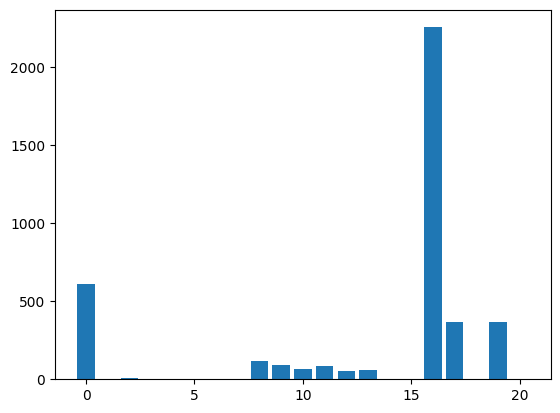

In [27]:
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_classif, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

columns_numerical = []
scores_numerical = []
X_train, X_test, y_train, y_test = train_test_split(df_numerical, df_categorical['default payment next month'], test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
 columns_numerical.append(df_numerical.columns[i])
 scores_numerical.append(fs.scores_[i])
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [28]:
dictionary = {'Column': columns_numerical, 'scores': scores_numerical} 

df_numerical_selected = pd.DataFrame(dictionary)
df_numerical_selected.sort_values(by='scores',ascending = False)


df_numerical_selected = df_numerical_selected[df_numerical_selected.scores >= 5.6]

numerical_column = []
for a in df_numerical_selected['Column'] : 
    numerical_column.append(a)
df_numerical_final = df_numerical[numerical_column]
df_numerical_final

,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AVG_PAY_DELAY,CREDIT_UTIL_RATIO,UTILIZATION_RATIO
0,20000,0,689,0,0,0,0,-0.333333,0.385200,0.385200
1,120000,0,1000,1000,1000,0,2000,0.500000,0.142308,0.142308
2,90000,1518,1500,1000,1000,1000,5000,0.000000,1.129478,1.129478
3,50000,2000,2019,1200,1100,1069,1000,0.000000,4.626680,4.626680
4,50000,2000,36681,10000,9000,689,679,-0.333333,2.186780,2.186780
...,...,...,...,...,...,...,...,...,...,...
29995,220000,8500,20000,5003,3047,5000,1000,0.000000,3.297041,3.297041
29996,150000,1837,3526,8998,129,0,0,-0.666667,0.141213,0.141213
29997,30000,0,0,22000,4200,2000,3100,1.333333,2.349867,2.349867
29998,80000,85900,3409,1178,1926,52964,1804,-0.166667,3.332638,3.332638


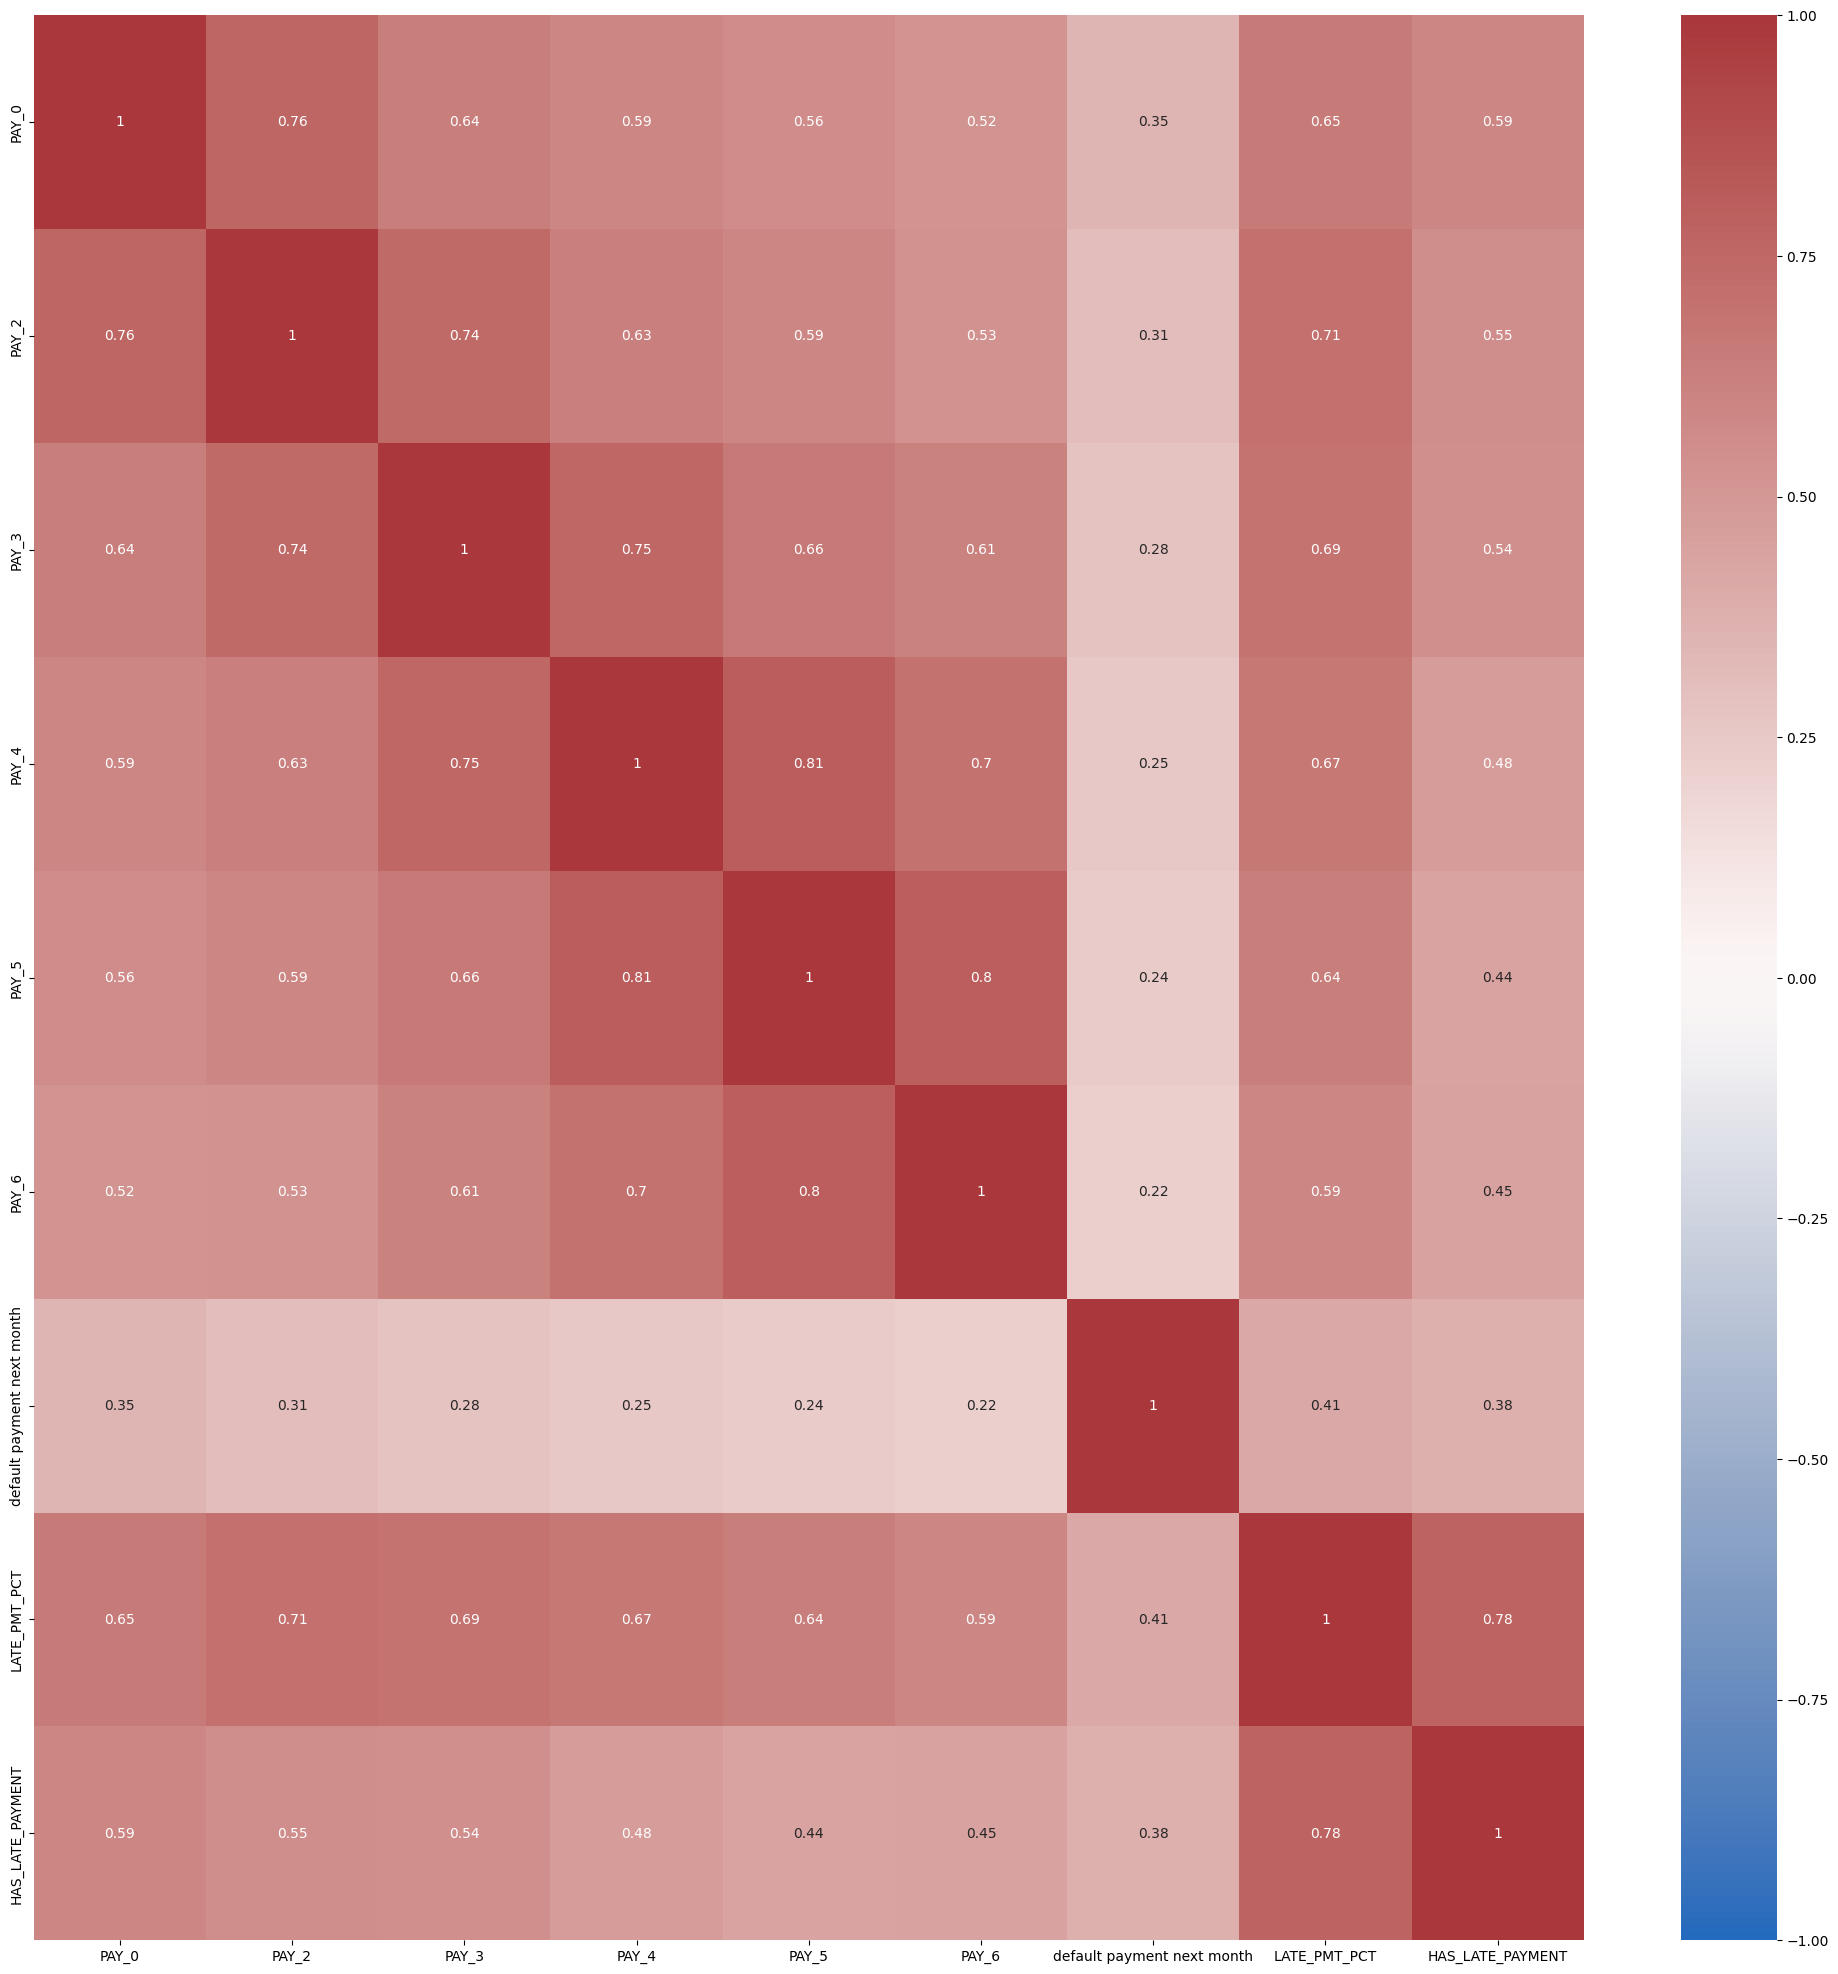

In [29]:
matrix = df_categorical_selected.corr().round(2)
plt.figure(figsize=(25,25))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [30]:
df_categorical_selected = df_categorical_selected.drop('default payment next month',axis =1)

### One Hot Encode & Normalization

In [31]:
def one_hot_encode(df, columns):
    for col in columns:
        dummies = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dummies], axis=1)
    return df.drop(columns, axis=1)

def standardize(df, columns):
    for col in columns:
        df[col] = (df[col] - df[col].mean()) / df[col].std()
    return df

In [32]:
df_numerical_final = standardize(df_numerical_final,df_numerical_final.columns)
df_categorical_selected = one_hot_encode(df_categorical_selected,df_categorical_selected.columns)

/tmp/ipykernel_2652/52857278.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (df[col] - df[col].mean()) / df[col].std()


In [33]:
df_combine = pd.concat([df_numerical_final,df_categorical_selected],axis = 1)

In [34]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27989 entries, 0 to 29999
Data columns (total 83 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LIMIT_BAL                        27989 non-null  float64
 1   PAY_AMT1                         27989 non-null  float64
 2   PAY_AMT2                         27989 non-null  float64
 3   PAY_AMT3                         27989 non-null  float64
 4   PAY_AMT4                         27989 non-null  float64
 5   PAY_AMT5                         27989 non-null  float64
 6   PAY_AMT6                         27989 non-null  float64
 7   AVG_PAY_DELAY                    27989 non-null  float64
 8   CREDIT_UTIL_RATIO                27989 non-null  float64
 9   UTILIZATION_RATIO                27989 non-null  float64
 10  PAY_0_-2                         27989 non-null  uint8  
 11  PAY_0_-1                         27989 non-null  uint8  
 12  PAY_0_0           

## Train Test Split

In [56]:
def train_test_split(X, y, test_size=0.25, train_size=None, shuffle=True, random_state=None):
    """
    Split the data into training and testing sets.

    Args:
    X (ndarray): The input features.
    y (ndarray): The target variable.
    test_size (float or int): The proportion of the data to use for testing (default is 0.25).
    train_size (float or int): The proportion of the data to use for training (default is None).
    shuffle (bool): Whether or not to shuffle the data before splitting. (default is True).
    random_state (int): The seed used by the random number generator (default is None).

    Returns:
    X_train (ndarray): The training features.
    y_train (ndarray): The training target variable.
    X_test (ndarray): The testing features.
    y_test (ndarray): The testing target variable.
    """
    if train_size is not None:
        if train_size > 1:
            test_size = int(X.shape[0]-train_size)
        else:
            test_size = int(X.shape[0]*train_size)
            train_size = int(X.shape[0]-test_size)
    else:
        if test_size > 1:
            train_size = int(X.shape[0]-test_size)
        else:
            train_size = int(X.shape[0]*test_size)
            test_size = int(X.shape[0]-train_size)
    
    if random_state:
        np.random.seed(random_state)

    if shuffle:
        keys = np.array(range(X.shape[0]))
        np.random.shuffle(keys)
        X = X[keys]
        y = y[keys]
    
    X_test = X[:test_size]
    y_test = y[:test_size]
    X_train = X[test_size:]
    y_train = y[test_size:]

    return X_train, X_test,y_train, y_test


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   30000 non-null  int64   
 1   SEX                         30000 non-null  int64   
 2   EDUCATION                   30000 non-null  int64   
 3   MARRIAGE                    30000 non-null  int64   
 4   AGE                         30000 non-null  int64   
 5   PAY_0                       30000 non-null  int64   
 6   PAY_2                       30000 non-null  int64   
 7   PAY_3                       30000 non-null  int64   
 8   PAY_4                       30000 non-null  int64   
 9   PAY_5                       30000 non-null  int64   
 10  PAY_6                       30000 non-null  int64   
 11  BILL_AMT1                   30000 non-null  int64   
 12  BILL_AMT2                   30000 non-null  int64   
 13  BILL_AMT3       

In [37]:
y = df2['default payment next month']
x = df_combine
print(x.shape, y.shape)

(27989, 83) (27989,)


In [57]:
X_train, X_test,y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2798, 83) (2798,) (25191, 83) (25191,)


## Comparing Algorithm

### RidgeClassifier

[Le Cessie, S., & Van Houwelingen, J. C. (1992). Ridge Estimators in Logistic Regression. Journal of the Royal Statistical Society. Series C (Applied Statistics), 41(1), 191–201.](https://academic.oup.com/jrsssc/article/41/1/191/6990520)

In [39]:
class RidgeClassifier:
    def __init__(self, alpha=1.0, max_iter=1000, tol=1e-3, random_state=None):
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
    
    # @jit
    def softmax(self, scores):
        max_scores = np.max(scores, axis=1, keepdims=True)
        exp_scores = np.exp(scores - max_scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return probs

    # @jit
    def gradient(self, n_samples, X, y_one_hot, proba):
        grad = -1/n_samples * X.T.dot(y_one_hot - proba) + 2 * self.alpha * self.coef_
        return grad

    def fit(self, X, y, verbose=1):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        # Add column of ones for bias term
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        
        n_samples, n_features = X.shape
        n_classes = np.unique(y).shape[0]
        
        # Initialize weight matrix
        self.coef_ = np.random.randn(n_features, n_classes)
        
        # Convert y to one-hot encoding
        y_one_hot = np.zeros((n_samples, n_classes))
        y_one_hot[np.arange(n_samples), y] = 1
        
        # Train using gradient descent with L2 regularization
        if verbose == 1:
            iter_range = tqdm(range(self.max_iter))
        elif verbose == 0:
            iter_range = range(self.max_iter)
        for i in iter_range:
            scores = X.dot(self.coef_)
            proba = self.softmax(scores)
            grad = self.gradient(n_samples, X, y_one_hot, proba)
            self.coef_ -= grad * self.tol
            
            # Stop training if change in coefficients is less than tolerance
            if np.linalg.norm(grad) < self.tol:
                break
                
    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        scores = X.dot(self.coef_)
        return np.argmax(scores, axis=1)

### Extreme Gradient Boosting (XGBoost) Classifier

[Chen, T. and Guestrin, C., 2016, August. Xgboost: A scalable tree boosting system. In Proceedings of the 22nd acm sigkdd international conference on knowledge discovery and data mining (pp. 785-794).](https://arxiv.org/abs/1603.0275)

Base Model: DecisionTree Classifier

In [40]:
class Node:
    def __init__(self):
        
        # links to the left and right child nodes
        self.right = None
        self.left = None
        
        # derived from splitting criteria
        self.column = None
        self.threshold = None
        
        # probability for object inside the Node to belong for each of the given classes
        self.probas = None
        # depth of the given node
        self.depth = None
        
        # if it is the root Node or not
        self.is_terminal = False


class DecisionTreeClassifier:
    def __init__(self, max_depth = 3, min_samples_leaf = 1, min_samples_split = 2):
        
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split
        
        self.classes = None
        self.verbosity = None
        # Decision tree itself
        self.Tree = None


    # @jit(nopython=True)
    def nodeProbas(self, y: np.ndarray, sample_weight: np.ndarray=None) -> np.ndarray: 
        """
        Calculates probability of class in a given node.
        """

        probas = []
        if sample_weight is None:
            sample_weight = np.ones_like(y)
        
        assert y.shape == sample_weight.shape, f"y {y.shape} and sample_weight {sample_weight.shape} must have the same shape"

        for one_class in self.classes:
            mask = y == one_class
            proba = np.sum(sample_weight[mask]) / np.sum(sample_weight)
            probas.append(proba)
        return np.asarray(probas)


    # @jit(nopython=True)
    def gini(self, probas: np.ndarray) -> float:
        '''
        Calculates gini criterion
        '''
        return 1 - np.sum(probas**2)


    def calcImpurity(self, y, sample_weight=None):
        """
        Wrapper for the impurity calculation. Calculates probas first and then passses them to the Gini criterion.
        """
        if sample_weight is None:
            sample_weight = np.ones_like(y)
        return self.gini(self.nodeProbas(y, sample_weight=sample_weight))
    
    # @jit(nopython=True)
    def calcInfoGain(self, impurityLeft: float, y_left: np.ndarray, impurityRight: float, y_right: np.ndarray, y: np.ndarray) -> float:
        """
        Calculates information gain
        """
        infogain = (impurityLeft * y_left.shape[0] / y.shape[0]) + (impurityRight * y_right.shape[0] / y.shape[0])
        return infogain

    
    def calcBestSplit(self, X, y, sample_weight=None):
        '''
        Calculates the best possible split for the concrete node of the tree
        '''
        
        bestSplitCol = None
        bestThresh = None
        bestInfoGain = -999
        
        impurityBefore = self.calcImpurity(y, sample_weight)

        if sample_weight is None:
            sample_weight = np.ones_like(y)

        if sample_weight is not None:
            total_weight = np.sum(sample_weight)
        else:
            total_weight = None

        # for each column in X
        if self.verbosity > 0:
            col_range = tqdm(range(X.shape[1]))
        else :
            col_range = range(X.shape[1])
        for col in col_range:
            x_col = X[:, col]
            
            # for each value in the column
            for x_i in np.unique(np.round(np.unique(x_col), 2)):
                threshold = x_i
                y_right = y[x_col > threshold]
                y_left = y[x_col <= threshold]
                sample_weight_right = sample_weight[x_col > threshold]
                sample_weight_left = sample_weight[x_col <= threshold]
                
                if y_right.shape[0] == 0 or y_left.shape[0] == 0:
                    continue

                # Parallelize
                def calcImpurity_tmp(y, sample_weight):
                    return self.calcImpurity(y, sample_weight)
                tmp = [[y_right, sample_weight_right], [y_left, sample_weight_left]]
                impurity_tmp = Parallel(n_jobs=-1)(delayed(calcImpurity_tmp)(y, sample_weight) for y, sample_weight in tmp)
                impurityRight = impurity_tmp[0]
                impurityLeft = impurity_tmp[1]
                # calculate information gain
                infoGain = impurityBefore
                infoGain -= self.calcInfoGain(impurityLeft, y_left, impurityRight, y_right, y)
                
                # is this infoGain better then all other?
                if infoGain > bestInfoGain:
                    bestSplitCol = col
                    bestThresh = threshold
                    bestInfoGain = infoGain
                    
        
        # if we still didn't find the split
        if bestInfoGain == -999:
            return None, None, None, None, None, None, None, None
        
        # making the best split
        
        x_col = X[:, bestSplitCol]
        x_left, x_right = X[x_col <= bestThresh, :], X[x_col > bestThresh, :]
        y_left, y_right = y[x_col <= bestThresh], y[x_col > bestThresh]
        sample_weight_left, sample_weight_right = sample_weight[x_col <= bestThresh], sample_weight[x_col > bestThresh]
        
        return bestSplitCol, bestThresh, x_left, y_left, x_right, y_right, sample_weight_right, sample_weight_left
                
          
    def buildDT(self, X, y, node, sample_weight):
        '''
        Recursively builds decision tree from the top to bottom
        '''
        
        # checking for the terminal conditions
        
        if node.depth >= self.max_depth:
            node.is_terminal = True
            return
            
        if X.shape[0] < self.min_samples_split:
            node.is_terminal = True
            return
            
        if np.unique(y).shape[0] == 1:
            node.is_terminal = True
            return
        
        # calculating current split
        splitCol, thresh, x_left, y_left, x_right, y_right, sample_weight_right, sample_weight_left = self.calcBestSplit(X, y, sample_weight)
        assert y_right.shape == sample_weight_right.shape and y_left.shape == sample_weight_left.shape, f"y_right {y_right.shape} and sample_weight_right {sample_weight_right.shape} must have the same shape\ny_left {y_left.shape} and sample_weight_left {sample_weight_left.shape} must have the same shape"
        if splitCol is None:
            node.is_terminal = True
            
        if x_left.shape[0] < self.min_samples_leaf or x_right.shape[0] < self.min_samples_leaf:
            node.is_terminal = True
            return
        
        node.column = splitCol
        node.threshold = thresh
        
        # creating left and right child nodes
        node.left = Node()
        node.left.depth = node.depth + 1
        node.left.probas = self.nodeProbas(y_left, sample_weight_left)
        
        node.right = Node()
        node.right.depth = node.depth + 1
        node.right.probas = self.nodeProbas(y_right, sample_weight_right)
        
        # splitting recursively
        # self.buildDT(x_right, y_right, node.right, sample_weight_right)
        # self.buildDT(x_left, y_left, node.left, sample_weight_left)
        dt_tmp = [[x_right, y_right, node.right, sample_weight_right], [x_left, y_left, node.left, sample_weight_left]]
        Parallel(n_jobs=-1)(delayed(self.buildDT)(_x, _y, _node, _sample_weight) for _x, _y, _node, _sample_weight in dt_tmp)
        
     
    def fit(self, X, y, sample_weight=None, verbose=1):
        '''
        Builds the Decision Tree based on the input data and labels
        '''
        X = np.asarray(X)
        y = np.asarray(y)
        self.verbosity = verbose

        # save the unique classes in the labels
        self.classes = np.unique(y)
        
        # if sample weights are not provided, use an array of ones
        if sample_weight is None:
            sample_weight = np.ones(y.shape[0])

        assert y.shape == sample_weight.shape, "y and sample_weight must have the same shape"

        # create the root node
        self.Tree = Node()
        self.Tree.depth = 0
        self.Tree.probas = self.nodeProbas(y, sample_weight)
        
        # build the tree recursively
        self.buildDT(X, y, self.Tree, sample_weight)
    
    
    def predictSample(self, x, node):
        '''
        Passes one object through decision tree and return the probability of it to belong to each class
        '''
       
    
        # if we have reached the terminal node of the tree
        if node.is_terminal  or node.threshold is None:
            return node.probas
        
        if x[node.column] > node.threshold:
            probas = self.predictSample(x, node.right)
        else:
            probas = self.predictSample(x, node.left)
            
        return probas
        
        
    def predict(self, X):
        '''
        Returns the labels for each X
        '''
        
        if type(X) == pd.DataFrame:
            X = np.asarray(X)
            
        predictions = []
        for x in X:
            pred = np.argmax(self.predictSample(x, self.Tree))
            predictions.append(pred)
        
        return np.asarray(predictions)

    def predict_proba(self, X):
        
        if type(X) == pd.DataFrame:
            X = np.asarray(X)
            
        predictions = []
        for x in X:
            pred = self.predictSample(x, self.Tree)
            predictions.append(pred)
        
        return np.asarray(predictions)

In [41]:

class XGBoostClassifier:
    def __init__(self, n_estimators=100, max_depth=3, learning_rate=0.1, subsample=1.0, reg_lambda=1.0):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.subsample = subsample
        self.reg_lambda = reg_lambda
        self.trees = []
   
    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        class_counts = np.bincount(y)
        class_weights = n_samples / (len(class_counts) * class_counts)
        self._f = 1e4*class_weights[y]
        for i in range(n_classes):
            # y_binary = np.where(y == self._classes[i], 1, -1)
            y_binary = y
            f = self.learning_rate * self._f
            f = np.zeros(n_samples)
            for j in tqdm(range(self.n_estimators), desc=f"XGBoost Class {i+1}/{n_classes}"):
                tree = self._fit_tree(X, y_binary, f, j)
                out = tree.predict(X)
                f += (self.learning_rate * out)
                self.trees.append(tree)
            # self._f += f
            # self._f = (self.learning_rate * self._sigmoid(self._f))/((self.n_estimators))


    def predict(self, X):
        probs = self.predict_proba(X)
        # return self._classes[np.argmax(probs, axis=1)]
        # return probs
        return (probs >= ((self.n_estimators) / 2)).astype(int)
    
    def predict_proba(self, X):
        n_samples = X.shape[0]
        n_classes = len(self._classes)
        # probs = np.zeros((n_samples, n_classes))
        probs = np.zeros(n_samples)
        for tree in self.trees:
            probs += tree.predict(X)
        # probs /= self.n_estimators

        return probs

    def _fit_tree(self, X, y, f, j):
        n_samples, n_features = X.shape
        # n_subsample = int(self.subsample * n_samples * (j+1) / self.n_estimators)
        n_subsample = int(self.subsample * n_samples )
        idxs = np.random.choice(n_samples, n_subsample, replace=False)
        X_subset = X[idxs]
        y_subset = y[idxs]
        f_subset = f[idxs]
        tree = DecisionTreeClassifier(max_depth=self.max_depth)
        tree.fit(X_subset, y_subset, sample_weight=self._get_sample_weights(y_subset, f_subset), verbose=0)
        return tree
    
    # @jit(nopython=True)
    def _get_sample_weights(self,y: np.ndarray, f: np.ndarray) -> np.ndarray:
        # Gradient Boosting sample weights calculation
        p = self._sigmoid(f)
        sample_weights = p * (1 - p)
        sample_weights = np.clip(sample_weights, 1e-6, 1 - 1e-6)
        sample_weights = np.where(y == 1, 1 / sample_weights, 1 / (1 - sample_weights))
        sample_weights /= np.mean(sample_weights)
        return sample_weights
    
    # @jit(nopython=True)
    def _sigmoid(self,x: np.ndarray) -> np.ndarray:
        return np.exp(-np.logaddexp(0, -x))

### Neural Network

[Schmidhuber, J., 2015. Deep learning in neural networks: An overview. Neural networks, 61, pp.85-117.](https://arxiv.org/abs/1404.7828)
[Amini, A., and Ava A., 2023. MIT 6.S191: Introduction to Deep Learning](http://introtodeeplearning.com/)

#### Layer

In [42]:
class Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0, weight_regularizer_l2=0,
                 bias_regularizer_l1=0, bias_regularizer_l2=0):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # Set regularization strength
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

    # Forward pass
    def forward(self, inputs, training):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)


        # Gradients on regularization
        # L1 on weights
        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1
        # L2 on weights
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * \
                             self.weights
        # L1 on biases
        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1
        # L2 on biases
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * \
                            self.biases

        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)

    # Retrieve layer parameters
    def get_parameters(self):
        return self.weights, self.biases

    # Set weights and biases in a layer instance
    def set_parameters(self, weights, biases):
        self.weights = weights
        self.biases = biases


class Dropout:

    # Init
    def __init__(self, rate):
        # Store rate, we invert it as for example for dropout
        # of 0.1 we need success rate of 0.9
        self.rate = 1 - rate

    # Forward pass
    def forward(self, inputs, training):
        # Save input values
        self.inputs = inputs


        # If not in the training mode - return values
        if not training:
            self.output = inputs.copy()
            return

        # Generate and save scaled mask
        self.binary_mask = np.random.binomial(1, self.rate,
                           size=inputs.shape) / self.rate
        # Apply mask to output values
        self.output = inputs * self.binary_mask

    # Backward pass
    def backward(self, dvalues):
        # Gradient on values
        self.dinputs = dvalues * self.binary_mask


# Input "layer"
class Input:

    # Forward pass
    def forward(self, inputs, training):
        self.output = inputs

#### Loss Function

In [43]:
class Loss:

    # Regularization loss calculation
    def regularization_loss(self):

        # 0 by default
        regularization_loss = 0

        # Calculate regularization loss
        # iterate all trainable layers
        for layer in self.trainable_layers:

            # L1 regularization - weights
            # calculate only when factor greater than 0
            if layer.weight_regularizer_l1 > 0:
                regularization_loss += layer.weight_regularizer_l1 * \
                                       np.sum(np.abs(layer.weights))

            # L2 regularization - weights
            if layer.weight_regularizer_l2 > 0:
                regularization_loss += layer.weight_regularizer_l2 * \
                                       np.sum(layer.weights * \
                                              layer.weights)

            # L1 regularization - biases
            # calculate only when factor greater than 0
            if layer.bias_regularizer_l1 > 0:
                regularization_loss += layer.bias_regularizer_l1 * \
                                       np.sum(np.abs(layer.biases))

            # L2 regularization - biases
            if layer.bias_regularizer_l2 > 0:
                regularization_loss += layer.bias_regularizer_l2 * \
                                       np.sum(layer.biases * \
                                              layer.biases)

        return regularization_loss

    # Set/remember trainable layers
    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers


    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y, *, include_regularization=False):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Add accumulated sum of losses and sample count
        self.accumulated_sum += np.sum(sample_losses)
        self.accumulated_count += len(sample_losses)

        # If just data loss - return it
        if not include_regularization:
            return data_loss

        # Return the data and regularization losses
        return data_loss, self.regularization_loss()

    # Calculates accumulated loss
    def calculate_accumulated(self, *, include_regularization=False):

        # Calculate mean loss
        data_loss = self.accumulated_sum / self.accumulated_count

        # If just data loss - return it
        if not include_regularization:
            return data_loss

        # Return the data and regularization losses
        return data_loss, self.regularization_loss()

    # Reset variables for accumulated loss
    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0


# Cross-entropy loss
class CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)


        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples



# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Softmax_Loss_CategoricalCrossentropy():

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Binary cross-entropy loss
class BinaryCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Calculate sample-wise loss
        sample_losses = -(y_true * np.log(y_pred_clipped) +
                          (1 - y_true) * np.log(1 - y_pred_clipped))
        sample_losses = np.mean(sample_losses, axis=-1)

        # Return losses
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])


        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        clipped_dvalues = np.clip(dvalues, 1e-7, 1 - 1e-7)

        # Calculate gradient
        self.dinputs = -(y_true / clipped_dvalues -
                         (1 - y_true) / (1 - clipped_dvalues)) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Mean Squared Error loss
class MeanSquaredError(Loss):  # L2 loss

    # Forward pass
    def forward(self, y_pred, y_true):

        # Calculate loss
        sample_losses = np.mean((y_true - y_pred)**2, axis=-1)

        # Return losses
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])

        # Gradient on values
        self.dinputs = -2 * (y_true - dvalues) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Mean Absolute Error loss
class MeanAbsoluteError(Loss):  # L1 loss

    def forward(self, y_pred, y_true):

        # Calculate loss
        sample_losses = np.mean(np.abs(y_true - y_pred), axis=-1)

        # Return losses
        return sample_losses


    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])

        # Calculate gradient
        self.dinputs = np.sign(y_true - dvalues) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples



#### Activation Function

In [44]:
class ReLU:
    """
    Rectified Linear Unit (ReLU) activation function.
    """

    def forward(self, inputs, training):
        """
        Forward pass of ReLU activation function.

        Args:
        inputs (ndarray): A numpy array of input values.
        training: A boolean flag indicating whether the network is in training mode.

        Returns:
        None
        """
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        """
        Backward pass of ReLU activation function.

        Args:
        dvalues (ndarray): A numpy array of gradient values.

        Returns:
        None
        """
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

    def predictions(self, outputs):
        """
        Returns predictions for outputs.

        Args:
        outputs (ndarray): A numpy array of output values.

        Returns:
        outputs (ndarray): A numpy array of output values.
        """
        return outputs



class Softmax:
    """
    Softmax activation function.
    """
    def forward(self, inputs, training):
        """
        Calculates the forward pass of the Softmax function.

        Args:
        inputs (ndarray): A numpy array of input values to the Softmax function.
        training: A boolean flag indicating if the network is training or testing.

        Returns:
        None
        """
        self.inputs = inputs

        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))

        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

    def backward(self, dvalues):
        """
        Calculates the backward pass of the Softmax function.

        Args:
        dvalues (ndarray): A numpy array of derivative values.

        Returns:
        None
        """
        self.dinputs = np.empty_like(dvalues)

        for index, (single_output, single_dvalues) in \
                enumerate(zip(self.output, dvalues)):
            single_output = single_output.reshape(-1, 1)
            jacobian_matrix = np.diagflat(single_output) - \
                              np.dot(single_output, single_output.T)
            self.dinputs[index] = np.dot(jacobian_matrix,
                                         single_dvalues)

    def predictions(self, outputs):
        """
        Calculates the predictions for the outputs of the Softmax function.

        Args:
        outputs (ndarray): A numpy array of outputs from the Softmax function.

        Returns:
        outputs (ndarray): A numpy array of output values.
        """
        return np.argmax(outputs, axis=1)



class Sigmoid:
    """
    Sigmoid activation function class.
    """
    def forward(self, inputs, training):
        """
        Calculates the forward pass of the Sigmoid function.

        Args:
        inputs (ndarray): A numpy array of input values to the Sigmoid function.
        training: A boolean flag indicating if the network is training or testing.

        Returns:
        None
        """
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))

    def backward(self, dvalues):
        """
        Calculates the backward pass of the Sigmoid function.

        Args:
        dvalues (ndarray): A numpy array of derivative values.

        Returns:
        None
        """
        self.dinputs = dvalues * (1 - self.output) * self.output

    def predictions(self, outputs):
        """
        Calculates the predictions for the outputs of the Sigmoid function.

        Args:
        outputs (ndarray): A numpy array of outputs from the Sigmoid function.

        Returns:
        outputs (ndarray): A numpy array of output values.
        """
        return (outputs > 0.5) * 1



#### Metrics

In [45]:
class Accuracy:
    """
    Calculates the accuracy of model predictions compared to ground truth values.
    """
    def __init__(self):
        """
        Initializes an Accuracy object with variables for accumulated sum of matching values and sample count.
        """
        self.accumulated_sum = 0
        self.accumulated_count = 0
    
    def calculate(self, predictions, y):
        """
        Calculates the accuracy of model predictions compared to ground truth values.
        
        Args:
        predictions (ndarray): A numpy array of model predictions.
        y (ndarray): A numpy array of ground truth values.
        
        Returns:
        accuracy (float): A float representing the accuracy of the model predictions.
        """
        # Get comparison results
        comparisons = self.compare(predictions, y)

        # Calculate an accuracy
        accuracy = np.mean(comparisons)

        # Add accumulated sum of matching values and sample count
        self.accumulated_sum += np.sum(comparisons)
        self.accumulated_count += len(comparisons)

        # Return accuracy
        return accuracy

    def calculate_accumulated(self):
        """
        Calculates the accumulated accuracy over multiple passes through the data.
        
        Returns:
        accuracy (float): A float representing the accumulated accuracy of the model predictions.
        """
        # Calculate an accuracy
        accuracy = self.accumulated_sum / self.accumulated_count

        # Return the data and regularization losses
        return accuracy

    def new_pass(self):
        """
        Resets the accumulated sum and count for a new pass through the data.
        """
        self.accumulated_sum = 0
        self.accumulated_count = 0



class Categorical_Accuracy(Accuracy):
    """
    Calculates the categorical accuracy of model predictions compared to ground truth values.
    Inherits from the Accuracy class.
    """
    def __init__(self, *, binary=False):
        """
        Initializes a Categorical_Accuracy object with a binary mode flag.

        Args:
        binary: A boolean flag indicating whether to use binary mode. Default is False.
        """
        super().__init__()
        self.binary = binary

    def init(self, y):
        """
        No initialization is needed for categorical accuracy calculation.

        Args:
        y: A numpy array of ground truth values.
        """
        pass

    def compare(self, predictions, y):
        """
        Compares model predictions to the ground truth values.

        Args:
        predictions (ndarray): A numpy array of model predictions.
        y (ndarray): A numpy array of ground truth values.

        Returns:
        comparisons (ndarray): A boolean numpy array representing the comparison results.
        """
        if not self.binary and len(y.shape) == 2:
            y = np.argmax(y, axis=1)
        return predictions == y




#### Optimizers

In [46]:
# Adam optimizer
class Adam:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7,
                 beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)


        # Update momentum  with current gradients
        layer.weight_momentums = self.beta_1 * \
                                 layer.weight_momentums + \
                                 (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * \
                               layer.bias_momentums + \
                               (1 - self.beta_1) * layer.dbiases
        # Get corrected momentum
        # self.iteration is 0 at first pass
        # and we need to start with 1 here
        weight_momentums_corrected = layer.weight_momentums / \
            (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / \
            (1 - self.beta_1 ** (self.iterations + 1))
        # Update cache with squared current gradients
        layer.weight_cache = self.beta_2 * layer.weight_cache + \
            (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + \
            (1 - self.beta_2) * layer.dbiases**2
        # Get corrected cache
        weight_cache_corrected = layer.weight_cache / \
            (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / \
            (1 - self.beta_2 ** (self.iterations + 1))

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         weight_momentums_corrected / \
                         (np.sqrt(weight_cache_corrected) +
                             self.epsilon)
        layer.biases += -self.current_learning_rate * \
                         bias_momentums_corrected / \
                         (np.sqrt(bias_cache_corrected) +
                             self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1




#### Model Class

In [47]:
class Model:

    def __init__(self):
        # Create a list of network objects
        self.layers = []
        # Softmax classifier's output object
        self.softmax_classifier_output = None

    # Add objects to the model
    def add(self, layer):
        self.layers.append(layer)


    # Set loss, optimizer and accuracy
    def set(self, *, loss=None, optimizer=None, accuracy=None):

        if loss is not None:
            self.loss = loss

        if optimizer is not None:
            self.optimizer = optimizer

        if accuracy is not None:
            self.accuracy = accuracy

    # Finalize the model
    def finalize(self):

        # Create and set the input layer
        self.input_layer = Input()

        # Count all the objects
        layer_count = len(self.layers)

        # Initialize a list containing trainable layers:
        self.trainable_layers = []

        # Iterate the objects
        for i in range(layer_count):

            # If it's the first layer,
            # the previous layer object is the input layer
            if i == 0:
                self.layers[i].prev = self.input_layer
                self.layers[i].next = self.layers[i+1]

            # All layers except for the first and the last
            elif i < layer_count - 1:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.layers[i+1]

            # The last layer - the next object is the loss
            # Also let's save aside the reference to the last object
            # whose output is the model's output
            else:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.loss
                self.output_layer_activation = self.layers[i]


            # If layer contains an attribute called "weights",
            # it's a trainable layer -
            # add it to the list of trainable layers
            # We don't need to check for biases -
            # checking for weights is enough
            if hasattr(self.layers[i], 'weights'):
                self.trainable_layers.append(self.layers[i])

        # Update loss object with trainable layers
        if self.loss is not None:
            self.loss.remember_trainable_layers(
                self.trainable_layers
            )

        # If output activation is Softmax and
        # loss function is Categorical Cross-Entropy
        # create an object of combined activation
        # and loss function containing
        # faster gradient calculation
        if isinstance(self.layers[-1], Softmax) and \
           isinstance(self.loss, CategoricalCrossentropy):
            # Create an object of combined activation
            # and loss functions
            self.softmax_classifier_output = \
                Softmax_Loss_CategoricalCrossentropy()
       

    # Train the model
    def train(self, X, y, *, epochs=1, batch_size=None,
              validation_data=None):

        self.history={'loss': [], 'val_loss': [], 'acc' : [], 'val_acc' : [], 'epochs' : []}

        # Initialize accuracy object
        self.accuracy.init(y)

        # Default value if batch size is not being set
        train_steps = 1

        # Calculate number of steps
        if batch_size is not None:
            train_steps = len(X) // batch_size
            # Dividing rounds down. If there are some remaining
            # data but not a full batch, this won't include it
            # Add `1` to include this not full batch
            if train_steps * batch_size < len(X):
                train_steps += 1


        # Main training loop
        for epoch in range(1, epochs+1):

            # Reset accumulated values in loss and accuracy objects
            self.loss.new_pass()
            self.accuracy.new_pass()

            # Iterate over steps
            for step in tqdm(range(train_steps), desc=f"Training Epoch: {epoch}/{epochs}"):

                # If batch size is not set -
                # train using one step and full dataset
                if batch_size is None:
                    batch_X = X
                    batch_y = y

                # Otherwise slice a batch
                else:
                    batch_X = X[step*batch_size:(step+1)*batch_size]
                    batch_y = y[step*batch_size:(step+1)*batch_size]

                # Perform the forward pass
                output = self.forward(batch_X, training=True)

                # Calculate loss
                data_loss, regularization_loss = \
                    self.loss.calculate(output, batch_y,
                                        include_regularization=True)
                loss = data_loss + regularization_loss

                # Get predictions and calculate an accuracy
                predictions = self.output_layer_activation.predictions(
                                  output)
                accuracy = self.accuracy.calculate(predictions,
                                                   batch_y)

                # Perform backward pass
                self.backward(output, batch_y)

                # Optimize (update parameters)
                self.optimizer.pre_update_params()
                for layer in self.trainable_layers:
                    self.optimizer.update_params(layer)
                self.optimizer.post_update_params()

            # Get and print epoch loss and accuracy
            epoch_data_loss, epoch_regularization_loss = \
                self.loss.calculate_accumulated(
                    include_regularization=True)
            epoch_loss = epoch_data_loss + epoch_regularization_loss
            epoch_accuracy = self.accuracy.calculate_accumulated()

            print(f'training, ' +
                  f'acc: {epoch_accuracy:.3f}, ' +
                  f'loss: {epoch_loss:.3f}')
                #   f'loss: {epoch_loss:.3f} (' +
                #   f'data_loss: {epoch_data_loss:.3f}, ' +
                #   f'reg_loss: {epoch_regularization_loss:.3f}), ' +
                #   f'lr: {self.optimizer.current_learning_rate}')

            self.history['loss'].append(epoch_loss)    
            self.history['acc'].append(epoch_accuracy)    
            self.history['epochs'].append(epoch)
            
            # If there is the validation data
            if validation_data is not None:

                # Evaluate the model:
                validation_accuracy, validation_loss = self.evaluate(*validation_data,
                                                                    batch_size=batch_size)
                self.history['val_loss'].append(validation_loss)
                self.history['val_acc'].append(validation_accuracy)

    # Evaluates the model using passed-in dataset
    def evaluate(self, X_val, y_val, *, batch_size=None):

        # Default value if batch size is not being set
        validation_steps = 1

        # Calculate number of steps
        if batch_size is not None:
            validation_steps = len(X_val) // batch_size
            # Dividing rounds down. If there are some remaining
            # data but not a full batch, this won't include it
            # Add `1` to include this not full batch
            if validation_steps * batch_size < len(X_val):
                validation_steps += 1

        # Reset accumulated values in loss
        # and accuracy objects
        self.loss.new_pass()
        self.accuracy.new_pass()


        # Iterate over steps
        for step in range(validation_steps):

            # If batch size is not set -
            # train using one step and full dataset
            if batch_size is None:
                batch_X = X_val
                batch_y = y_val

            # Otherwise slice a batch
            else:
                batch_X = X_val[
                    step*batch_size:(step+1)*batch_size
                ]
                batch_y = y_val[
                    step*batch_size:(step+1)*batch_size
                ]

            # Perform the forward pass
            output = self.forward(batch_X, training=False)

            # Calculate the loss
            self.loss.calculate(output, batch_y)

            # Get predictions and calculate an accuracy
            predictions = self.output_layer_activation.predictions(
                              output)
            self.accuracy.calculate(predictions, batch_y)

        # Get and print validation loss and accuracy
        validation_loss = self.loss.calculate_accumulated()
        validation_accuracy = self.accuracy.calculate_accumulated()

        # Print a summary
        print(f'validation, ' +
              f'acc: {validation_accuracy:.3f}, ' +
              f'loss: {validation_loss:.3f}')
        return validation_accuracy, validation_loss

    # Predicts on the samples
    def predict(self, X, *, batch_size=None):

        # Default value if batch size is not being set
        prediction_steps = 1

        # Calculate number of steps
        if batch_size is not None:
            prediction_steps = len(X) // batch_size

            # Dividing rounds down. If there are some remaining
            # data but not a full batch, this won't include it
            # Add `1` to include this not full batch
            if prediction_steps * batch_size < len(X):
                prediction_steps += 1

        # Model outputs
        output = []

        # Iterate over steps
        for step in range(prediction_steps):

            # If batch size is not set -
            # train using one step and full dataset
            if batch_size is None:
                batch_X = X

            # Otherwise slice a batch
            else:
                batch_X = X[step*batch_size:(step+1)*batch_size]

            # Perform the forward pass
            batch_output = self.forward(batch_X, training=False)

            # Append batch prediction to the list of predictions
            output.append(batch_output)

        # Stack and return results
        return np.vstack(output)

    # Performs forward pass
    def forward(self, X, training):

        # Call forward method on the input layer
        # this will set the output property that
        # the first layer in "prev" object is expecting
        self.input_layer.forward(X, training)

        # Call forward method of every object in a chain
        # Pass output of the previous object as a parameter
        for layer in self.layers:
            layer.forward(layer.prev.output, training)

        # "layer" is now the last object from the list,
        # return its output
        return layer.output


    # Performs backward pass
    def backward(self, output, y):

        # If softmax classifier
        if self.softmax_classifier_output is not None:
            # First call backward method
            # on the combined activation/loss
            # this will set dinputs property
            self.softmax_classifier_output.backward(output, y)

            # Since we'll not call backward method of the last layer
            # which is Softmax activation
            # as we used combined activation/loss
            # object, let's set dinputs in this object
            self.layers[-1].dinputs = \
                self.softmax_classifier_output.dinputs

            # Call backward method going through
            # all the objects but last
            # in reversed order passing dinputs as a parameter
            for layer in reversed(self.layers[:-1]):
                layer.backward(layer.next.dinputs)

            return

        # First call backward method on the loss
        # this will set dinputs property that the last
        # layer will try to access shortly
        self.loss.backward(output, y)

        # Call backward method going through all the objects
        # in reversed order passing dinputs as a parameter
        for layer in reversed(self.layers):
            layer.backward(layer.next.dinputs)

    # Retrieves and returns parameters of trainable layers
    def get_parameters(self):

        # Create a list for parameters
        parameters = []

        # Iterable trainable layers and get their parameters
        for layer in self.trainable_layers:
            parameters.append(layer.get_parameters())

        # Return a list
        return parameters


    # Updates the model with new parameters
    def set_parameters(self, parameters):

        # Iterate over the parameters and layers
        # and update each layers with each set of the parameters
        for parameter_set, layer in zip(parameters,
                                        self.trainable_layers):
            layer.set_parameters(*parameter_set)

    # Saves the parameters to a file
    def save_parameters(self, path):

        # Open a file in the binary-write mode
        # and save parameters into it
        with open(path, 'wb') as f:
            pickle.dump(self.get_parameters(), f)

    # Loads the weights and updates a model instance with them
    def load_parameters(self, path):

        # Open file in the binary-read mode,
        # load weights and update trainable layers
        with open(path, 'rb') as f:
            self.set_parameters(pickle.load(f))

    # Saves the model
    def save(self, path):

        # Make a deep copy of current model instance
        model = copy.deepcopy(self)

        # Reset accumulated values in loss and accuracy objects
        model.loss.new_pass()
        model.accuracy.new_pass()

        # Remove data from the input layer
        # and gradients from the loss object
        model.input_layer.__dict__.pop('output', None)
        model.loss.__dict__.pop('dinputs', None)

        # For each layer remove inputs, output and dinputs properties
        for layer in model.layers:
            for property in ['inputs', 'output', 'dinputs',
                             'dweights', 'dbiases']:
                layer.__dict__.pop(property, None)

        # Open a file in the binary-write mode and save the model
        with open(path, 'wb') as f:
            pickle.dump(model, f)


    # Loads and returns a model
    @staticmethod
    def load(path):

        # Open file in the binary-read mode, load a model
        with open(path, 'rb') as f:
            model = pickle.load(f)

        # Return a model
        return model


### Logistic Regression

In [48]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient descent
        for i in tqdm(range(self.num_iterations)):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)
            
            # calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_cls = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred_cls)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


### SVM

In [49]:
class SVM:
    def __init__(self, learning_rate=0.01, max_iters=100, C=0.5):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.C = C
    
    # @jit
    def binary_cross_entropy_loss(self, y_true, y_pred):
        # N = y_true.shape[0]
        N = 1 
        loss = -(1/N) * np.sum(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))
        return loss

    # @jit
    def sigmoid(self,x):
        return np.exp(-np.logaddexp(0, -x))

    # @jit
    def accuracy(self, y_true, y_pred):
        sum = 0
        for i in range(len(y_true)):
            if y_pred[i] == y_true[i]:
                sum = sum + 1
        return sum/len(y_pred)

    # @jit   
    def fit(self, X, y, verbose = 0):
        X = np.asarray(X)
        y = np.asarray(y)
        n_samples, n_features = X.shape
        
        # Initialize the weight and bias parameters
        self.w = np.zeros(n_features)
        self.b = 0
        
        # Perform stochastic gradient descent to optimize the SVM objective
        for epoch in tqdm(range(self.max_iters), position=0,leave=True, desc="Training SVM Models"):
            for i in range(n_samples):
                # Choose a random training example
                rand_idx = np.random.randint(0, n_samples)
                X_i, y_i = X[rand_idx], y[rand_idx]
                
                # Calculate the binary_cross entropy loss and its derivative
                loss = self.C * max(0, 1 - y_i * (np.dot(X_i, self.w) - self.b))
                if loss == 0:
                    grad_w = 0
                    grad_b = 0
                else:
                    grad_w = self.C * y_i * X_i
                    grad_b = -self.C * y_i
                
                # Update the weight and bias parameters using gradient descent
                self.w -= self.learning_rate * (grad_w + 2 * self.w)
                self.b -= self.learning_rate * grad_b
            if verbose > 0:
                y_pred = self.sigmoid(np.dot(X, self.w) - self.b)
                acc = self.accuracy(y, y_pred.astype(int))
                print(f'\nEpoch {epoch}/{self.max_iters}: Train Accuracy: {acc}')
        y_pred = self.sigmoid(np.dot(X, self.w) - self.b)
        acc = self.accuracy(y, y_pred.astype(int))
        print(f'\nTrain Accuracy: {acc}')

    def predict(self, X):
        X = np.asarray(X)
        # Calculate the predicted class labels for the input data
        y_pred = self.sigmoid(np.dot(X, self.w) - self.b)
        return y_pred.astype(int)


## K-Fold Function

In [50]:
def k_fold(X, y, k=5):
    """
    Splits the dataset into k folds for cross-validation.

    Parameters:
    X : ndarray
        The features of the dataset
    y : ndarray
        The labels of the dataset
    k : int
        The number of folds to create. Default is 5.

    Returns:
    folds : list of tuples
        A list of k tuples, where each tuple contains two ndarrays. The first
        array contains the features for the training set and the second array
        contains the labels for the training set. The remaining data is used for
        testing.
    """
    # Shuffle the dataset
    indices = np.random.permutation(len(X))
    X = X[indices]
    y = y[indices]

    # Calculate the size of each fold
    fold_size = len(X) // k

    # Split the data into k folds
    folds = []
    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size
        X_test = X[start:end]
        y_test = y[start:end]
        X_train = np.concatenate([X[:start], X[end:]])
        y_train = np.concatenate([y[:start], y[end:]])
        folds.append((X_train, y_train, X_test, y_test))

    return folds

## Model Fitting and Performances

Accuracy

In [51]:
def accuracy(y, pred):
    sum = 0
    for i in range(len(y)):
        if pred[i] == y[i]:
            sum = sum + 1
    return sum/len(pred)


F1-Score

In [52]:
def f1_score(y_true, y_pred):
    # tp = np.sum((y_true == 1) & (y_pred == 1))
    # fp = np.sum((y_true == 0) & (y_pred == 1))
    # fn = np.sum((y_true == 1) & (y_pred == 0))
    
    # if tp == 0 and fp == 0:
    #     precision = accuracy(y_true, y_pred)
    # else :
    #     precision = tp / (tp + fp)
    # if tp == 0 and fn == 0:
    #     recall = 0
    # else :
    #     recall = tp / (tp + fn)
    
    # class_weights = np.bincount(y_true) / len(y_true)
    
    # f1_scores = 2 * precision * recall / (precision + recall)
    
    # weighted_f1_score = np.sum(f1_scores * class_weights)
    
    # return weighted_f1_score
    from sklearn.metrics import f1_score

    return f1_score(y_true, y_pred, average='weighted')


In [53]:
def conf_matrix(ytrue, yhat):
    from sklearn.metrics import confusion_matrix
    confussionMatrix = confusion_matrix(ytrue, yhat)
    label=np.sort(np.unique(ytrue))
    cm_df = pd.DataFrame(confussionMatrix,
                     index = label, 
                     columns = label)
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

5-fold Splitting

In [54]:
folds = k_fold(np.array(x),np.array(y),5)

### Logistic Regression

In [58]:
clf = LogisticRegression()
train_acc_LR = []
val_acc_LR = []
train_f1_LR = []
val_f1_LR = []
print('Training on Training data from 90% data..')
clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)
print(f'Accuracy: Training: {accuracy(np.array(y_train), train_pred)}, Validation: {accuracy(np.array(y_test), test_pred)}')
print(f'Weighted F1-score: Training: {f1_score(np.array(y_train), train_pred)}, Validation: {f1_score(np.array(y_test), test_pred)}')
clf = LogisticRegression()
for i, fold in enumerate(folds):
    print(f"Training on fold {i+1}/5...")
    X_train1, y_train1, X_test1, y_test1 = fold
    clf.fit(X_train1, y_train1)
    pred = clf.predict(X_train1)
    pred2 = clf.predict(X_test1)
    train_acc_LR.append(accuracy(np.array(y_train1), pred))
    val_acc_LR.append(accuracy(np.array(y_test1), pred2))
    train_f1_LR.append(f1_score(np.array(y_train1), pred))
    val_f1_LR.append(f1_score(np.array(y_test1), pred2))
print(f'K_fold Accuracy_LR: Training {sum(train_acc_LR)/len(train_acc_LR)}, Validation_LR :  {sum(val_acc_LR)/len(val_acc_LR)}')
print(f'K_fold F1-Weighted_LR: Training {sum(train_f1_LR)/len(train_f1_LR)}, Validation_LR :  {sum(val_f1_LR)/len(val_f1_LR)}')

Training on Training data from 90% data..
100%|██████████| 1000/1000 [00:31<00:00, 31.88it/s]
Accuracy: Training: 0.8187991422444604, Validation: 0.8120757413361915
Weighted F1-score: Training: 0.7921631357605534, Validation: 0.7877610864275517
Training on fold 1/5...
100%|██████████| 1000/1000 [00:28<00:00, 35.44it/s]
Training on fold 2/5...
100%|██████████| 1000/1000 [00:28<00:00, 35.51it/s]
Training on fold 3/5...
100%|██████████| 1000/1000 [00:28<00:00, 35.53it/s]
Training on fold 4/5...
100%|██████████| 1000/1000 [00:27<00:00, 36.53it/s]
Training on fold 5/5...
100%|██████████| 1000/1000 [00:23<00:00, 41.85it/s]
K_fold Accuracy_LR: Training 0.8127992140050019, Validation_LR :  0.8126139003037341
K_fold F1-Weighted_LR: Training 0.784778293946488, Validation_LR :  0.7845792579819479


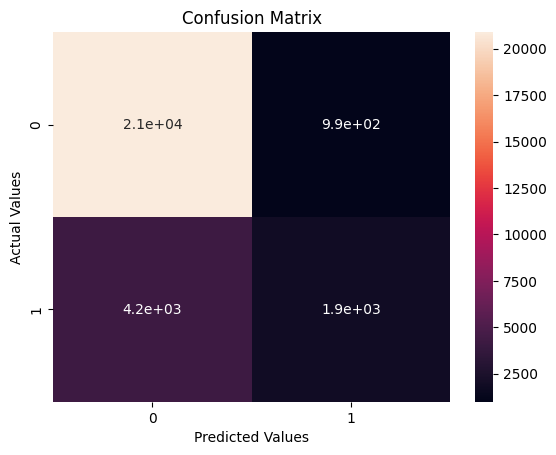

In [59]:
pred = clf.predict(x)
conf_matrix(np.asarray(y), pred)

100%|██████████| 1000/1000 [00:24<00:00, 40.79it/s]


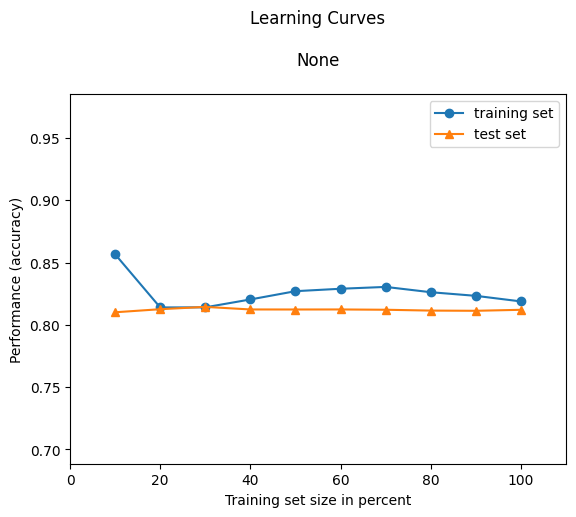

In [60]:
clf = LogisticRegression()
plot_learning_curves(X_train, y_train, X_test, y_test, clf, scoring='accuracy')
plt.show()

### SVM Model

In [61]:
clf = SVM(learning_rate=0.001)
train_acc_SVM = []
val_acc_SVM = []
train_f1_SVM = []
val_f1_SVM = []
print('Training on Training data from 90% data..')
clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)
print(f'Accuracy: Training: {accuracy(np.array(y_train), train_pred)}, Validation: {accuracy(np.array(y_test), test_pred)}')
print(f'Weighted F1-score: Training: {f1_score(np.array(y_train), train_pred)}, Validation: {f1_score(np.array(y_test), test_pred)}')
clf = SVM(learning_rate=0.001)
for i, fold in enumerate(folds):
    print(f"Training on fold {i+1}/5...")
    X_train1, y_train1, X_test1, y_test1 = fold
    clf.fit(X_train1, y_train1)
    pred = clf.predict(X_train1)
    pred2 = clf.predict(X_test1)
    train_acc_SVM.append(accuracy(np.array(y_train1), pred))
    val_acc_SVM.append(accuracy(np.array(y_test1), pred2))
    train_f1_SVM.append(f1_score(np.array(y_train1), pred))
    val_f1_SVM.append(f1_score(np.array(y_test1), pred2))
print(f'K_fold Accuracy_SVM: Training {sum(train_acc_SVM)/len(train_acc_SVM)}, Validation_SVM :  {sum(val_acc_SVM)/len(val_acc_SVM)}')
print(f'K_fold F1-Weighted_SVM: Training {sum(train_f1_SVM)/len(train_f1_SVM)}, Validation_SVM :  {sum(val_f1_SVM)/len(val_f1_SVM)}')

Training on Training data from 90% data..
Training SVM Models: 100%|██████████| 100/100 [00:20<00:00,  4.88it/s]

Train Accuracy: 0.781987133666905
Accuracy: Training: 0.781987133666905, Validation: 0.7819856297884165
Weighted F1-score: Training: 0.6863168264994737, Validation: 0.6863147659256856
Training on fold 1/5...
Training SVM Models: 100%|██████████| 100/100 [02:24<00:00,  1.45s/it]

Train Accuracy: 0.7821989996427295
Training on fold 2/5...
Training SVM Models: 100%|██████████| 100/100 [02:40<00:00,  1.61s/it]

Train Accuracy: 0.7823329760628795
Training on fold 3/5...
Training SVM Models: 100%|██████████| 100/100 [02:25<00:00,  1.46s/it]

Train Accuracy: 0.7823776348695963
Training on fold 4/5...
Training SVM Models: 100%|██████████| 100/100 [02:26<00:00,  1.47s/it]

Train Accuracy: 0.7820650232225795
Training on fold 5/5...
Training SVM Models: 100%|██████████| 100/100 [02:30<00:00,  1.50s/it]

Train Accuracy: 0.7809038942479457
K_fold Accuracy_SVM: Training 0.781975705609146

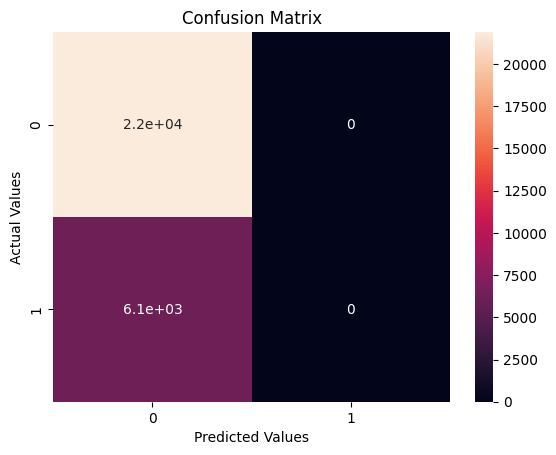

In [62]:
pred = clf.predict(x)
conf_matrix(np.asarray(y), pred)

Training SVM Models: 100%|██████████| 100/100 [00:02<00:00, 48.05it/s]

Train Accuracy: 0.7634408602150538
Training SVM Models: 100%|██████████| 100/100 [00:04<00:00, 22.42it/s]

Train Accuracy: 0.7477638640429338
Training SVM Models: 100%|██████████| 100/100 [00:05<00:00, 16.86it/s]

Train Accuracy: 0.7532777115613826
Training SVM Models: 100%|██████████| 100/100 [00:09<00:00, 10.89it/s]

Train Accuracy: 0.7694369973190348
Training SVM Models: 100%|██████████| 100/100 [00:11<00:00,  8.59it/s]

Train Accuracy: 0.781987133666905
Training SVM Models: 100%|██████████| 100/100 [00:12<00:00,  7.74it/s]

Train Accuracy: 0.7890345649582837
Training SVM Models: 100%|██████████| 100/100 [00:14<00:00,  7.08it/s]

Train Accuracy: 0.7911133810010215
Training SVM Models: 100%|██████████| 100/100 [00:18<00:00,  5.48it/s]

Train Accuracy: 0.7890974084003575
Training SVM Models: 100%|██████████| 100/100 [00:19<00:00,  5.05it/s]

Train Accuracy: 0.7859412231930103
Training SVM Models: 100%|██████████| 

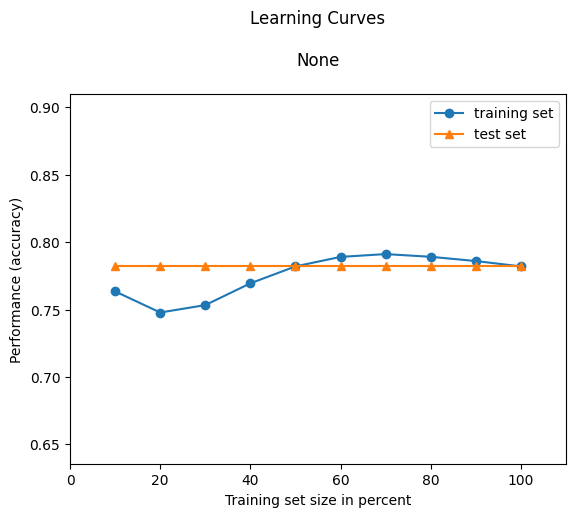

In [63]:
clf = SVM(learning_rate=0.001)
plot_learning_curves(X_train, y_train, X_test, y_test, clf, scoring='accuracy')
plt.show()

### RidgeClassifier

In [64]:
clf = RidgeClassifier(alpha=0.7, max_iter=1000, tol=2e-3, random_state=42)
train_acc_RC = []
val_acc_RC = []
train_f1_RC = []
val_f1_RC = []
print('Training on Training data from 90% data..')
clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)
print(f'Accuracy: Training: {accuracy(np.array(y_train), train_pred)}, Validation: {accuracy(np.array(y_test), test_pred)}')
print(f'Weighted F1-score: Training: {f1_score(np.array(y_train), train_pred)}, Validation: {f1_score(np.array(y_test), test_pred)}')
clf = RidgeClassifier(alpha=0.7, max_iter=1000, tol=2e-3, random_state=42)
for i, fold in enumerate(folds):
    print(f"Training on fold {i+1}/5...")
    X_train1, y_train1, X_test1, y_test1 = fold
    clf.fit(X_train1, y_train1)
    pred = clf.predict(X_train1)
    pred2 = clf.predict(X_test1)
    train_acc_RC.append(accuracy(np.array(y_train1), pred))
    val_acc_RC.append(accuracy(np.array(y_test1), pred2))
    train_f1_RC.append(f1_score(np.array(y_train1), pred))
    val_f1_RC.append(f1_score(np.array(y_test1), pred2))
print(f'K_fold Accuracy_RC: Training {sum(train_acc_RC)/len(train_acc_RC)}, Validation_RC :  {sum(val_acc_RC)/len(val_acc_RC)}')
print(f'K_fold F1-Weighted_RC: Training {sum(train_f1_RC)/len(train_f1_RC)}, Validation_RC :  {sum(val_f1_RC)/len(val_f1_RC)}')

Training on Training data from 90% data..
100%|██████████| 1000/1000 [00:11<00:00, 89.22it/s]
Accuracy: Training: 0.823445318084346, Validation: 0.8086221269501013
Weighted F1-score: Training: 0.8007589104636165, Validation: 0.7841350092035071
Training on fold 1/5...
100%|██████████| 1000/1000 [00:52<00:00, 19.16it/s]
Training on fold 2/5...
100%|██████████| 1000/1000 [00:47<00:00, 21.16it/s]
Training on fold 3/5...
100%|██████████| 1000/1000 [00:39<00:00, 25.29it/s]
Training on fold 4/5...
100%|██████████| 1000/1000 [00:46<00:00, 21.58it/s]
Training on fold 5/5...
100%|██████████| 1000/1000 [00:47<00:00, 21.12it/s]K_fold Accuracy_RC: Training 0.8092979635584138, Validation_RC :  0.8091120242987315
K_fold F1-Weighted_RC: Training 0.7833820311556845, Validation_RC :  0.7831523234022856



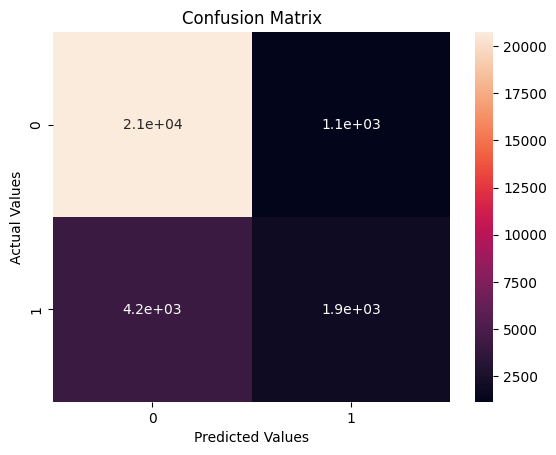

In [65]:
pred = clf.predict(x)
conf_matrix(np.asarray(y), pred)

100%|██████████| 1000/1000 [00:10<00:00, 93.87it/s]


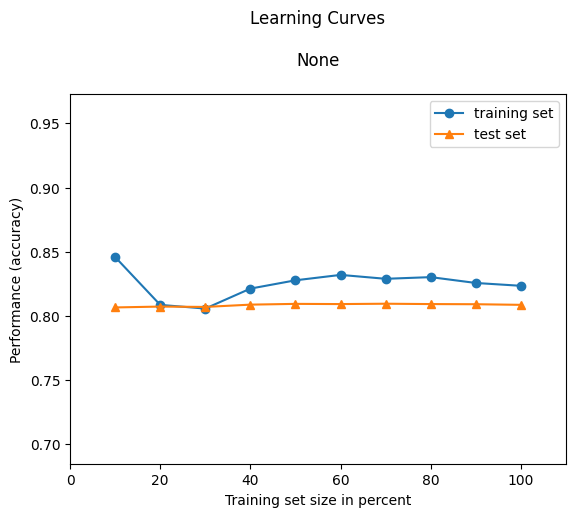

In [66]:
clf = RidgeClassifier(alpha=0.7, max_iter=1000, tol=2e-3, random_state=42)
plot_learning_curves(X_train, y_train, X_test, y_test, clf, scoring='accuracy')
plt.show()

### XGBoost Classifier

In [75]:
clf = XGBoostClassifier(n_estimators=3, max_depth=5)
train_acc_XGB = []
val_acc_XGB = []
train_f1_XGB = []
val_f1_XGB = []
print('Training on Training data from 90% data..')
clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)
print(f'Accuracy: Training: {accuracy(np.array(y_train), train_pred)}, Validation: {accuracy(np.array(y_test), test_pred)}')
print(f'Weighted F1-score: Training: {f1_score(np.array(y_train), train_pred)}, Validation: {f1_score(np.array(y_test), test_pred)}')
clf = XGBoostClassifier(n_estimators=3, max_depth=5)
for i, fold in enumerate(folds):
    print(f"Training on fold {i+1}/5...")
    X_train1, y_train1, X_test1, y_test1 = fold
    clf.fit(X_train1, y_train1)
    pred = clf.predict(X_train1)
    pred2 = clf.predict(X_test1)
    train_acc_XGB.append(accuracy(np.array(y_train1), pred))
    val_acc_XGB.append(accuracy(np.array(y_test1), pred2))
    train_f1_XGB.append(f1_score(np.array(y_train1), pred))
    val_f1_XGB.append(f1_score(np.array(y_test1), pred2))
print(f'K_fold Accuracy_XGB: Training {sum(train_acc_XGB)/len(train_acc_XGB)}, Validation_XGB :  {sum(val_acc_XGB)/len(val_acc_XGB)}')
print(f'K_fold F1-Weighted_XGB: Training {sum(train_f1_XGB)/len(train_f1_XGB)}, Validation_XGB :  {sum(val_f1_XGB)/len(val_f1_XGB)}')

Training on Training data from 90% data..
XGBoost Class 2/2: 100%|██████████| 3/3 [01:26<00:00, 28.77s/it]
Accuracy: Training: 0.7451751250893496, Validation: 0.69246953276964
Weighted F1-score: Training: 0.765435675564155, Validation: 0.7171055898737688
Training on fold 1/5...
XGBoost Class 2/2: 100%|██████████| 3/3 [04:33<00:00, 91.05s/it]
Training on fold 2/5...
XGBoost Class 2/2: 100%|██████████| 3/3 [04:43<00:00, 94.62s/it]
Training on fold 3/5...
XGBoost Class 2/2: 100%|██████████| 3/3 [03:16<00:00, 65.35s/it]
Training on fold 4/5...
XGBoost Class 2/2: 100%|██████████| 3/3 [03:21<00:00, 67.16s/it]
Training on fold 5/5...
XGBoost Class 2/2: 100%|██████████| 3/3 [03:24<00:00, 68.02s/it]
K_fold Accuracy_XGB: Training 0.7664433726330832, Validation_XGB :  0.7647311059496159
K_fold F1-Weighted_XGB: Training 0.7775435672436741, Validation_XGB :  0.7759340274716242


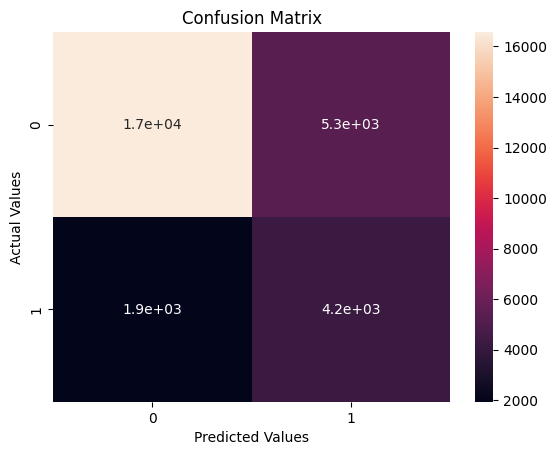

In [76]:
pred = clf.predict(x)
conf_matrix(np.asarray(y), pred)

XGBoost Class 2/2: 100%|██████████| 3/3 [01:01<00:00, 20.38s/it]


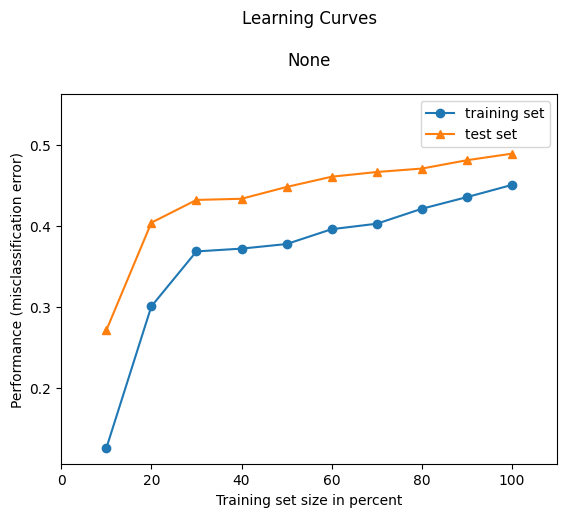

In [77]:
xgb = XGBoostClassifier(n_estimators=3, max_depth=5)
plot_learning_curves(X_train, y_train, X_test, y_test, xgb)
plt.show()

### Neural Network

In [70]:
def create_nn():
    model = Model()



    model.add(Dense(X_train.shape[1], 64))
    model.add(ReLU())
    model.add(Dense(64, 128))
    model.add(ReLU())
    model.add(Dense(128, 128))
    model.add(ReLU())
    model.add(Dense(128, 2))
    model.add(Softmax())


    model.set(
        loss=CategoricalCrossentropy(),
        optimizer=Adam(learning_rate=1e-3, decay=1e-5),
        accuracy=Categorical_Accuracy()
    )


    model.finalize()
    return model


In [69]:
model = create_nn()
print('Training on Training data from 90% data..')
model.train(X_train, y_train, validation_data=(X_test, y_test),
    epochs=10, batch_size=128)
train_pred = np.argmax(model.predict(X_train), axis=1)
test_pred = np.argmax(model.predict(X_test), axis=1)
print(f'Accuracy: Training: {accuracy(np.array(y_train), train_pred)}, Validation: {accuracy(np.array(y_test), test_pred)}')
print(f'Weighted F1-score: Training: {f1_score(np.array(y_train), train_pred)}, Validation: {f1_score(np.array(y_test), test_pred)}')
model = create_nn()
train_acc = []
val_acc = []
history = []
train_f1 = []
val_f1 = []
for i, fold in enumerate(folds):
    print(f"Training on fold {i+1}/5...")
    X_train1, y_train1, X_test1, y_test1 = fold
    model.train(X_train1, y_train1, validation_data=(X_test1, y_test1),
    epochs=10, batch_size=128)
    pred = model.predict(X_train1)
    train_acc.append(accuracy(y_train1, np.argmax(pred, axis=1)))
    pred2 = model.predict(X_test1)
    val_acc.append(accuracy(y_test1, np.argmax(pred2, axis=1)))
    history.append(model.history)
    train_f1.append(f1_score(np.array(y_train1), np.argmax(pred, axis=1)))
    val_f1.append(f1_score(np.array(y_test1), np.argmax(pred2, axis=1)))
print(f'K_fold Accuracy: Training {sum(train_acc)/len(train_acc)}, Validation {sum(val_acc)/len(val_acc)}')
print(f'K_fold F1-Weighted: Training {sum(train_f1)/len(train_f1)}, Validation :  {sum(val_f1)/len(val_f1)}')

Training on Training data from 90% data..
Training Epoch: 1/10: 100%|██████████| 22/22 [00:01<00:00, 13.55it/s]
training, acc: 0.780, loss: 0.644
validation, acc: 0.782, loss: 0.485
Training Epoch: 2/10: 100%|██████████| 22/22 [00:01<00:00, 14.87it/s]
training, acc: 0.782, loss: 0.445
validation, acc: 0.782, loss: 0.446
Training Epoch: 3/10: 100%|██████████| 22/22 [00:01<00:00, 11.81it/s]
training, acc: 0.787, loss: 0.434
validation, acc: 0.817, loss: 0.438
Training Epoch: 4/10: 100%|██████████| 22/22 [00:02<00:00,  8.09it/s]
training, acc: 0.823, loss: 0.430
validation, acc: 0.820, loss: 0.434
Training Epoch: 5/10: 100%|██████████| 22/22 [00:01<00:00, 11.47it/s]
training, acc: 0.831, loss: 0.420
validation, acc: 0.822, loss: 0.431
Training Epoch: 6/10: 100%|██████████| 22/22 [00:01<00:00, 14.29it/s]
training, acc: 0.838, loss: 0.412
validation, acc: 0.824, loss: 0.431
Training Epoch: 7/10: 100%|██████████| 22/22 [00:01<00:00, 11.90it/s]
training, acc: 0.840, loss: 0.408
validation, ac

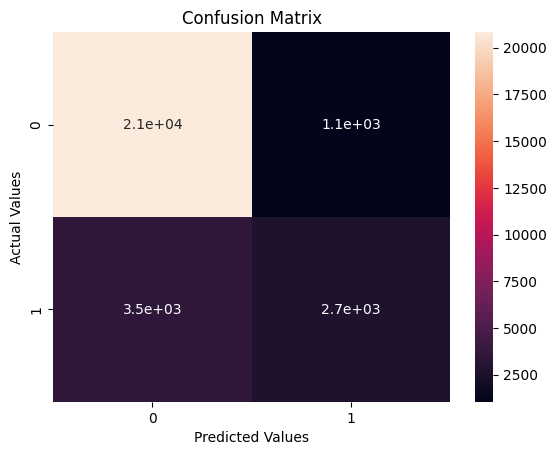

In [73]:
pred = np.argmax(model.predict(x), axis=1)
conf_matrix(np.asarray(y), pred)

<function matplotlib.pyplot.show(close=None, block=None)>

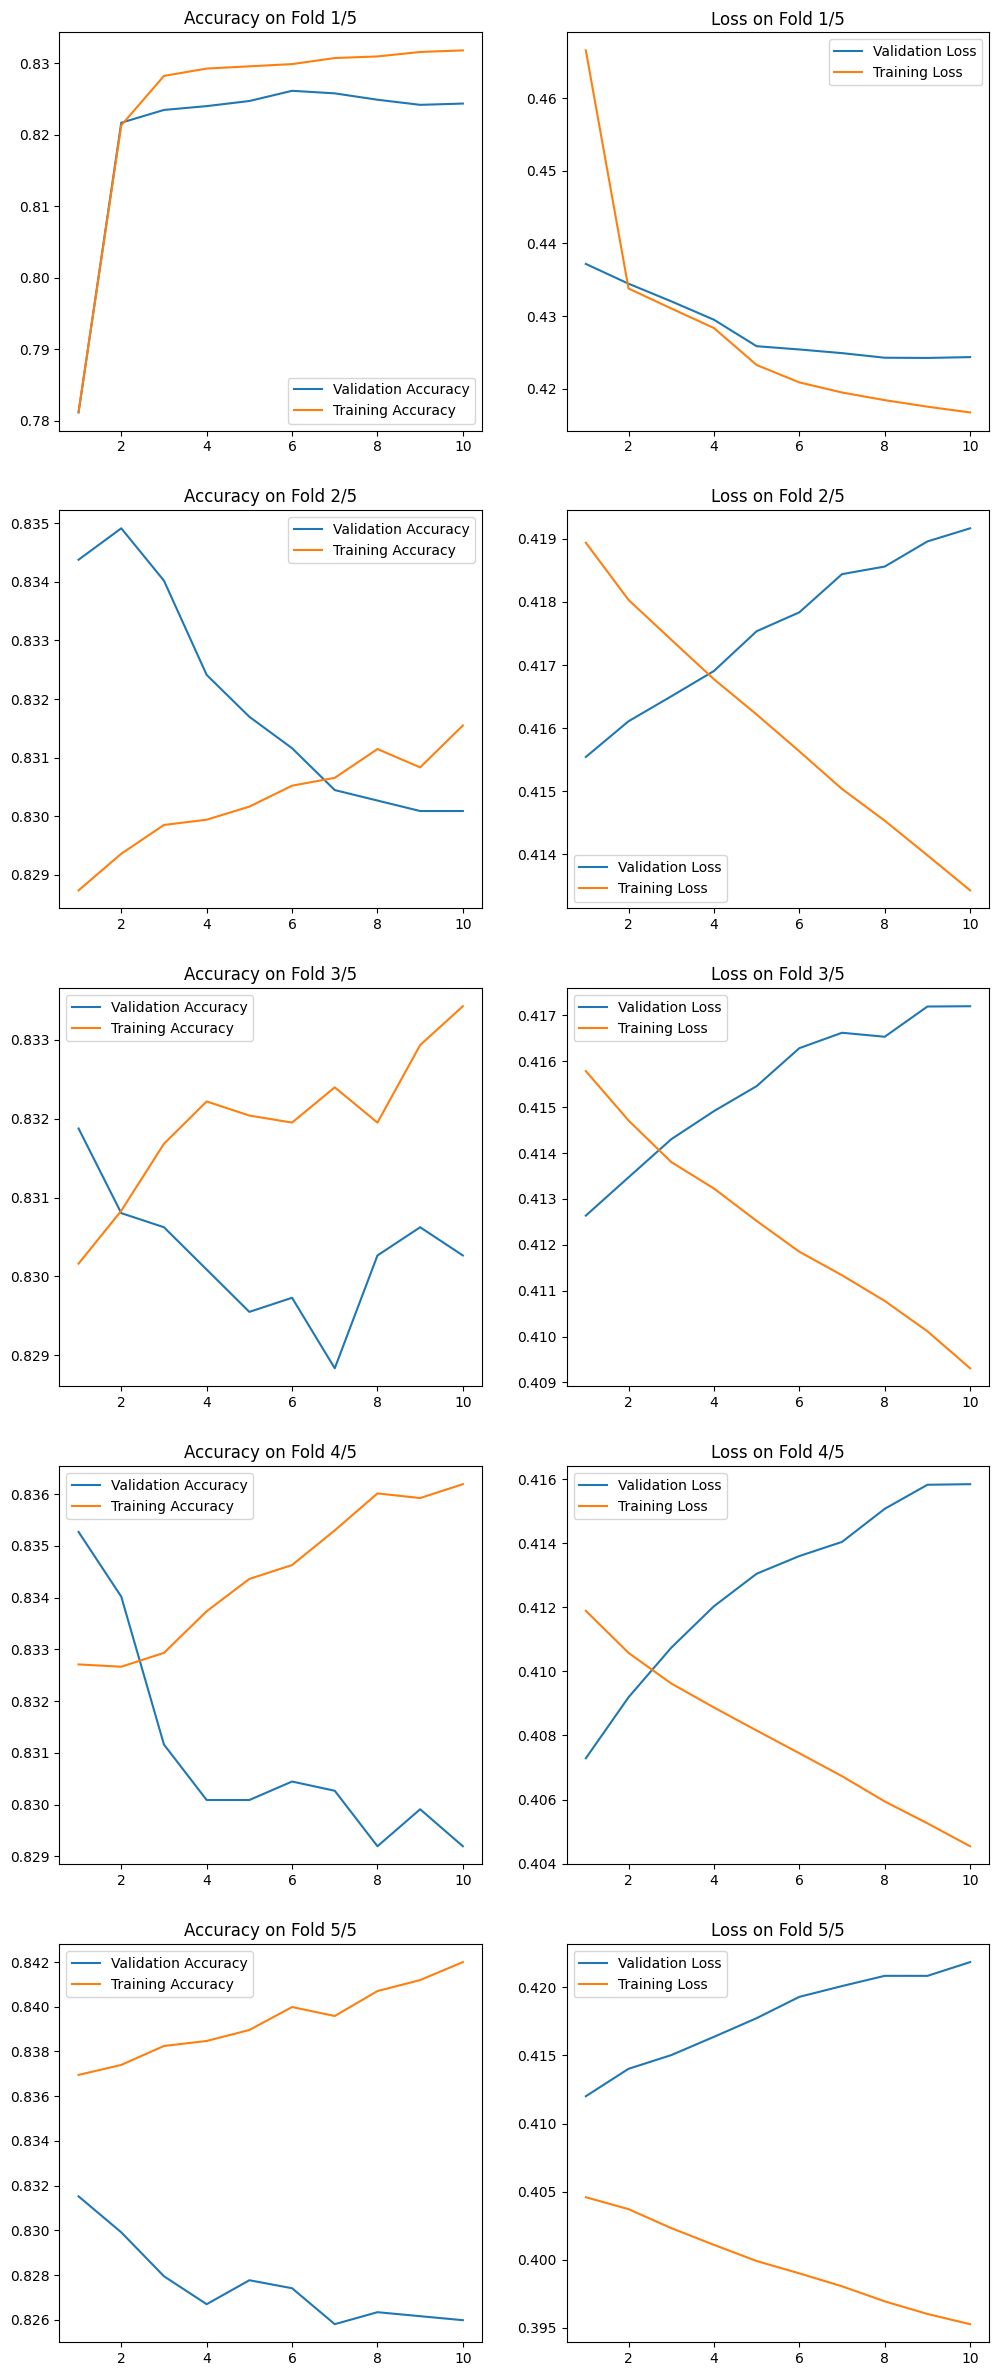

In [74]:
fig, axs = plt.subplots(len(history), 2, figsize=(12, 6*len(history))) 

for i, hist in enumerate(history):
    axs[i, 0].plot(hist['epochs'], hist['val_acc'], label='Validation Accuracy')
    axs[i, 0].plot(hist['epochs'], hist['acc'], label='Training Accuracy')
    axs[i, 0].set_title(f'Accuracy on Fold {i+1}/{len(history)}')
    axs[i, 0].legend()
    axs[i, 1].plot(hist['epochs'], hist['val_loss'], label='Validation Loss')
    axs[i, 1].plot(hist['epochs'], hist['loss'], label='Training Loss')
    axs[i, 1].set_title(f'Loss on Fold {i+1}/{len(history)}')
    axs[i, 1].legend()
plt.show

## Summary

Comparing all of the three model, we can conclude that () has greater accuracy and F1-Score relative to other.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6fddd774-2b9a-4be5-ac67-24258f0a2f37' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>